<a href="https://colab.research.google.com/github/mirzab/ml/blob/main/Photonics_paper1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Synthetic Dataset:
   APR  Pitch (um)  wavelength (um)  Effective Index
0  0.6         0.8          1.80000         1.286181
1  0.6         0.8          1.58333         1.372607
2  0.6         0.8          1.41322         1.339799
3  0.6         0.8          1.27612         1.319799
4  0.6         0.8          1.16327         1.253403
Dataset saved as CSV: pcf_data.csv
Dataset saved as Excel: pcf_data.xlsx


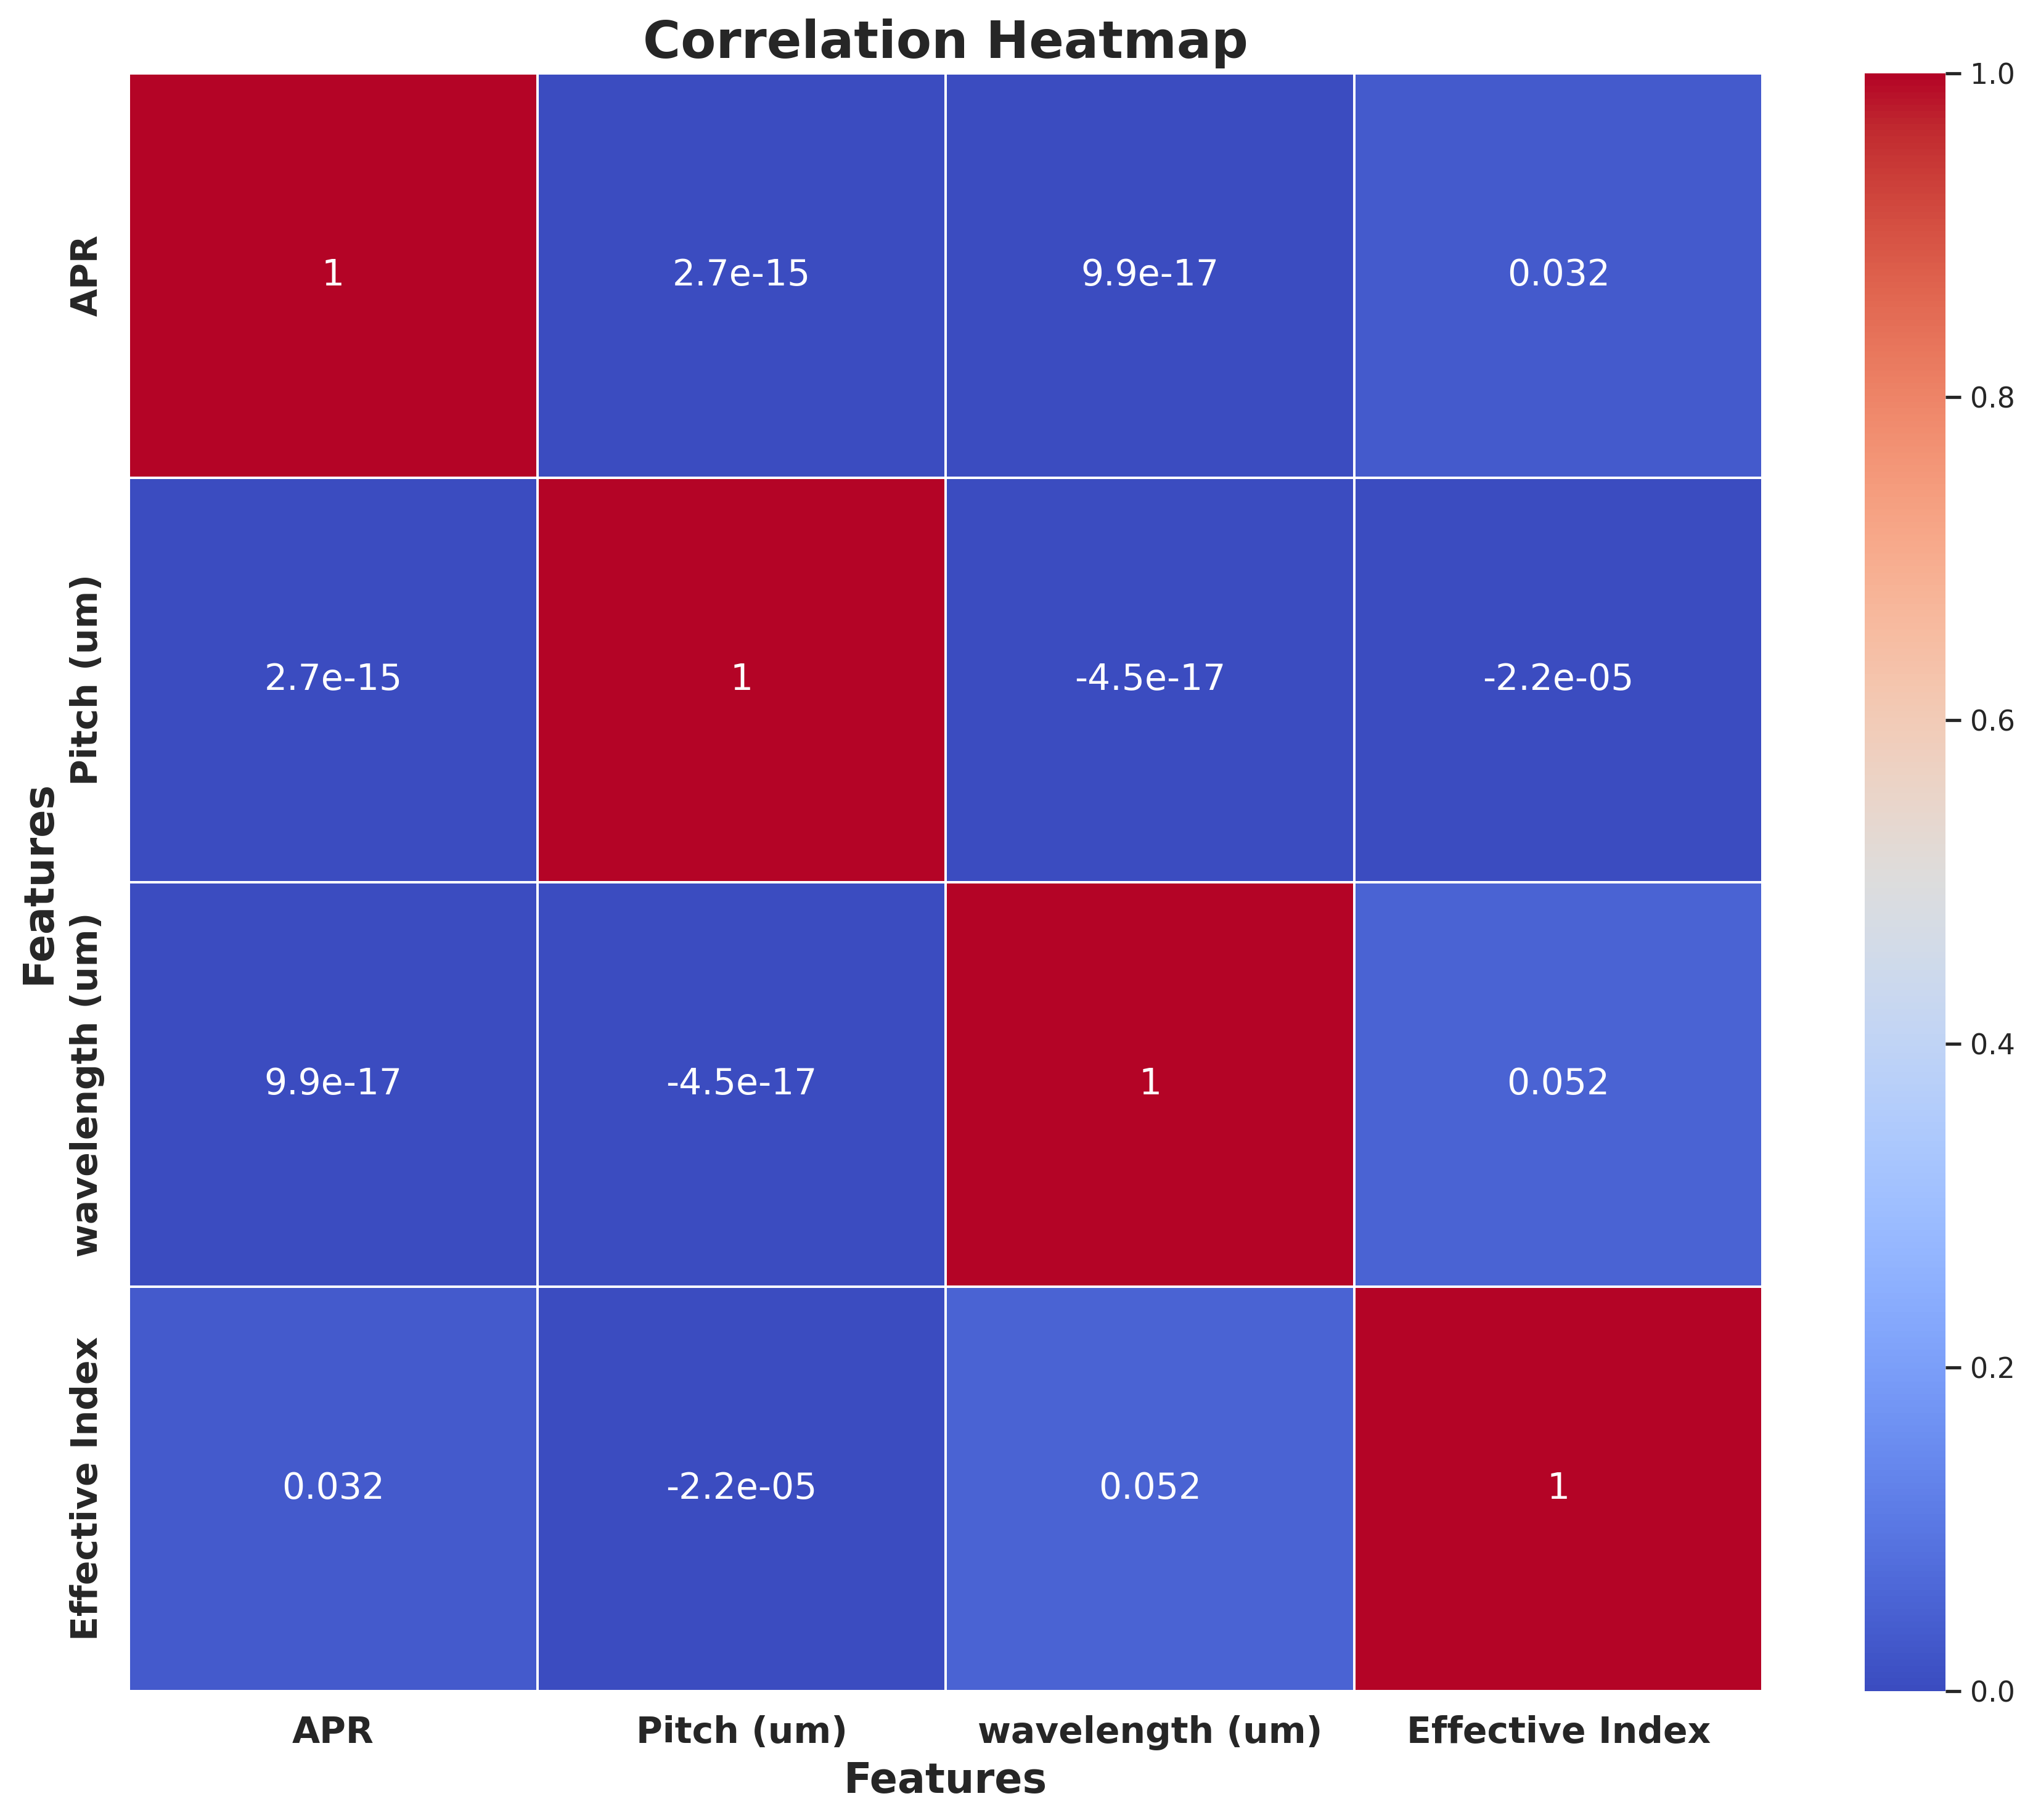

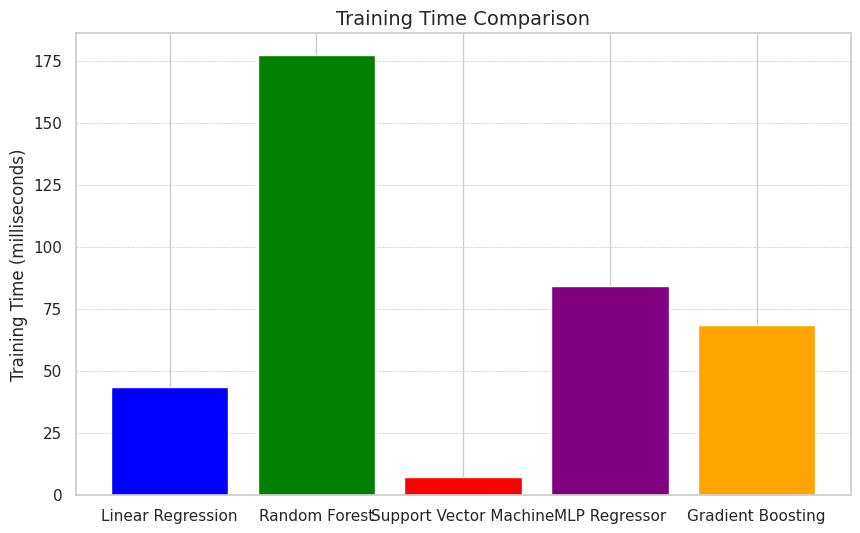

Linear Regression: 43.274879455566406 milliseconds
Random Forest: 177.40845680236816 milliseconds
Support Vector Machine: 7.048130035400391 milliseconds
MLP Regressor: 84.32221412658691 milliseconds
Gradient Boosting: 68.50075721740723 milliseconds
Correlation between APR and APR: 1.00
Correlation between APR and Pitch (um): 0.00
Correlation between APR and wavelength (um): 0.00
Correlation between APR and Effective Index: 0.03
Correlation between Pitch (um) and APR: 0.00
Correlation between Pitch (um) and Pitch (um): 1.00
Correlation between Pitch (um) and wavelength (um): -0.00
Correlation between Pitch (um) and Effective Index: -0.00
Correlation between wavelength (um) and APR: 0.00
Correlation between wavelength (um) and Pitch (um): -0.00
Correlation between wavelength (um) and wavelength (um): 1.00
Correlation between wavelength (um) and Effective Index: 0.05
Correlation between Effective Index and APR: 0.03
Correlation between Effective Index and Pitch (um): -0.00
Correlation bet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)

# Number of data points
num_data_points = 400

# Generate synthetic data
dia_by_pitch = np.repeat([0.6, 0.7, 0.8, 0.9], num_data_points // 4)

wavelength_pattern = np.tile([1.8, 1.58333, 1.41322, 1.27612, 1.16327], num_data_points // 5)
wavelength = wavelength_pattern[:num_data_points]

pitch_pattern = np.tile([0.8, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0], num_data_points // 10)
pitch = np.tile(pitch_pattern, num_data_points // len(pitch_pattern) + 1)[:num_data_points]

effective_index = np.random.uniform(1.23, 1.38, num_data_points)

# Create a synthetic dataset
synthetic_dataset = pd.DataFrame({
    'APR': dia_by_pitch,
    'Pitch (um)': pitch,
    'wavelength (um)': wavelength,
    'Effective Index': effective_index
})

# Display the synthetic dataset
print("Synthetic Dataset:")
print(synthetic_dataset.head())

# Save the synthetic dataset to CSV and Excel files
synthetic_dataset.to_csv('pcf_data.csv', index=False)
synthetic_dataset.to_excel('pcf_data.xlsx', index=False)

print("Dataset saved as CSV: pcf_data.csv")
print("Dataset saved as Excel: pcf_data.xlsx")

# Load data
df = pd.read_excel('pcf_data.xlsx', sheet_name='Sheet1')

# Set plot style
sns.set(style='whitegrid')

# Display correlation heatmap
plt.figure(figsize=(12, 10), dpi=300)  # Set figure size and dpi for high-definition
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 14})  # Set annotation size
plt.title('Correlation Heatmap', fontsize=20, weight='bold')  # Set title font size and weight
plt.xlabel('Features', fontsize=16, weight='bold')  # Set x-axis label font size and weight
plt.ylabel('Features', fontsize=16, weight='bold')  # Set y-axis label font size and weight
plt.xticks(fontsize=14, weight='bold')  # Set x-axis tick font size and weight
plt.yticks(fontsize=14, weight='bold')  # Set y-axis tick font size and weight
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)
df_scaler = scaler.transform(df)

# Define inputs and outputs
num_inputs = 3
num_outputs = 1
X = df_scaler[:, range(0, num_inputs)]
y = df_scaler[:, range(num_inputs, num_inputs + num_outputs)]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define and train models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=1, n_estimators=100)
svm_model = SVR(kernel='linear')
mlp_model = MLPRegressor(shuffle=True, random_state=1, max_iter=1000)
gb_model = GradientBoostingRegressor(random_state=1, n_estimators=100)

models = {'Linear Regression': linear_model, 'Random Forest': rf_model, 'Support Vector Machine': svm_model,
          'MLP Regressor': mlp_model, 'Gradient Boosting': gb_model}

# Compare models
training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    end_time = time.time()

    # Store training times in milliseconds
    training_times[name] = (end_time - start_time) * 1000

# Plot Training Times comparison as bar plot
plt.figure(figsize=(10, 6))
plt.bar(training_times.keys(), training_times.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.ylabel('Training Time (milliseconds)', fontsize=12)
plt.title('Training Time Comparison', fontsize=14)
plt.savefig('training_time_comparison_bar.png', bbox_inches='tight')
plt.show()

for name, time_ms in training_times.items():
    print(f"{name}: {time_ms} milliseconds")


# Get correlation values
correlation_matrix = df.corr()
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        print(f'Correlation between {correlation_matrix.index[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}')
plt.show()

Training Times:
Linear Regression: 4.33 milliseconds
Random Forest: 293.97 milliseconds
Support Vector Machine: 12.37 milliseconds
MLP Regressor: 191.10 milliseconds
Gradient Boosting: 144.87 milliseconds

Mean Squared Error (MSE):
Linear Regression: 0.0018
Random Forest: 0.0021
Support Vector Machine: 0.0019
MLP Regressor: 0.0019
Gradient Boosting: 0.0020

R-squared (R2):
Linear Regression: -0.0174
Random Forest: -0.1746
Support Vector Machine: -0.0347
MLP Regressor: -0.0377
Gradient Boosting: -0.1309


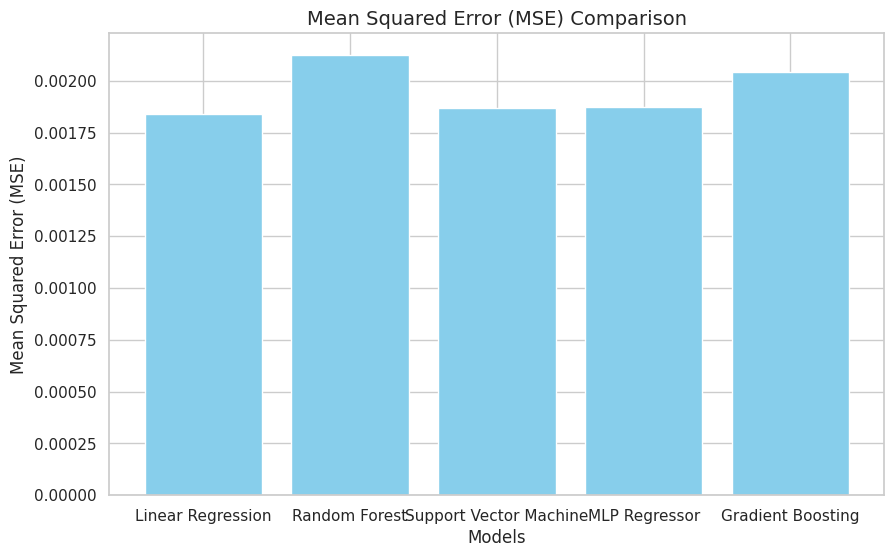

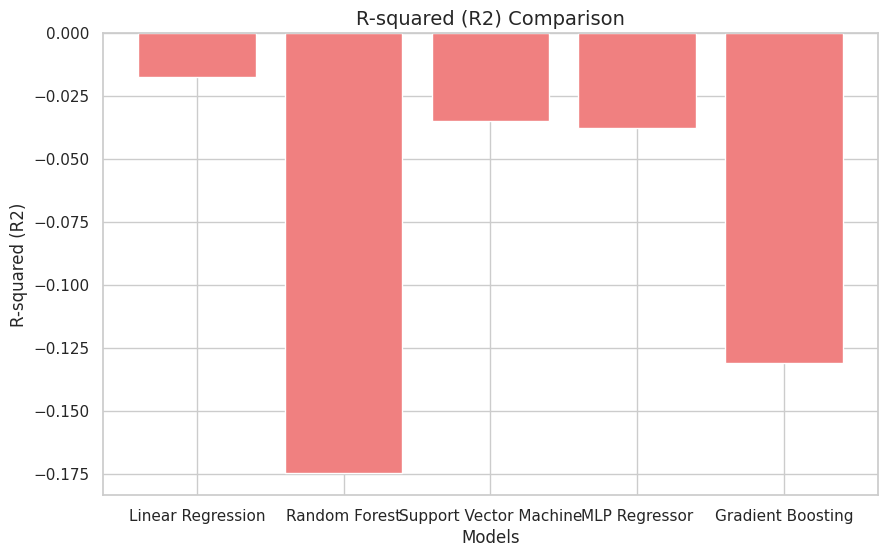

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, f1_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)

# ... (Previous code for synthetic data generation and loading)

# Define and train models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=1, n_estimators=100)
svm_model = SVR(kernel='linear')
mlp_model = MLPRegressor(shuffle=True, random_state=1, max_iter=1000)
gb_model = GradientBoostingRegressor(random_state=1, n_estimators=100)

models = {'Linear Regression': linear_model, 'Random Forest': rf_model, 'Support Vector Machine': svm_model,
          'MLP Regressor': mlp_model, 'Gradient Boosting': gb_model}

# Compare models
training_times = {}
mse_values = {}
r2_values = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    end_time = time.time()

    # Store training times in milliseconds
    training_times[name] = (end_time - start_time) * 1000

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Inverse transform to get original values
    y_original = scaler.inverse_transform(np.concatenate((X_test, y_test), axis=1))[:, -1]
    y_predicted = scaler.inverse_transform(np.concatenate((X_test, y_pred.reshape(-1, 1)), axis=1))[:, -1]

    # Calculate and store Mean Squared Error (MSE)
    mse_values[name] = mean_squared_error(y_original, y_predicted)

    # Calculate and store R-squared (R2)
    r2_values[name] = r2_score(y_original, y_predicted)

    # If it's a classification model, you can calculate F1 Score (not applicable for regression)
    # f1_values[name] = f1_score(y_original, y_predicted)

# Display the results
print("Training Times:")
for name, time_val in training_times.items():
    print(f'{name}: {time_val:.2f} milliseconds')

print("\nMean Squared Error (MSE):")
for name, mse_val in mse_values.items():
    print(f'{name}: {mse_val:.4f}')

print("\nR-squared (R2):")
for name, r2_val in r2_values.items():
    print(f'{name}: {r2_val:.4f}')

# For classification models:
# print("\nF1 Score:")
# for name, f1_val in f1_values.items():
#     print(f'{name}: {f1_val:.4f}')
# For classification models:
# print("\nF1 Score:")
# for name, f1_val in f1_values.items():
#     print(f'{name}: {f1_val:.4f}')
# Visualize Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Mean Squared Error (MSE) Comparison', fontsize=14)
plt.show()

# Visualize R-squared (R2)
plt.figure(figsize=(10, 6))
plt.bar(r2_values.keys(), r2_values.values(), color='lightcoral')
plt.xlabel('Models', fontsize=12)
plt.ylabel('R-squared (R2)', fontsize=12)
plt.title('R-squared (R2) Comparison', fontsize=14)
plt.show()






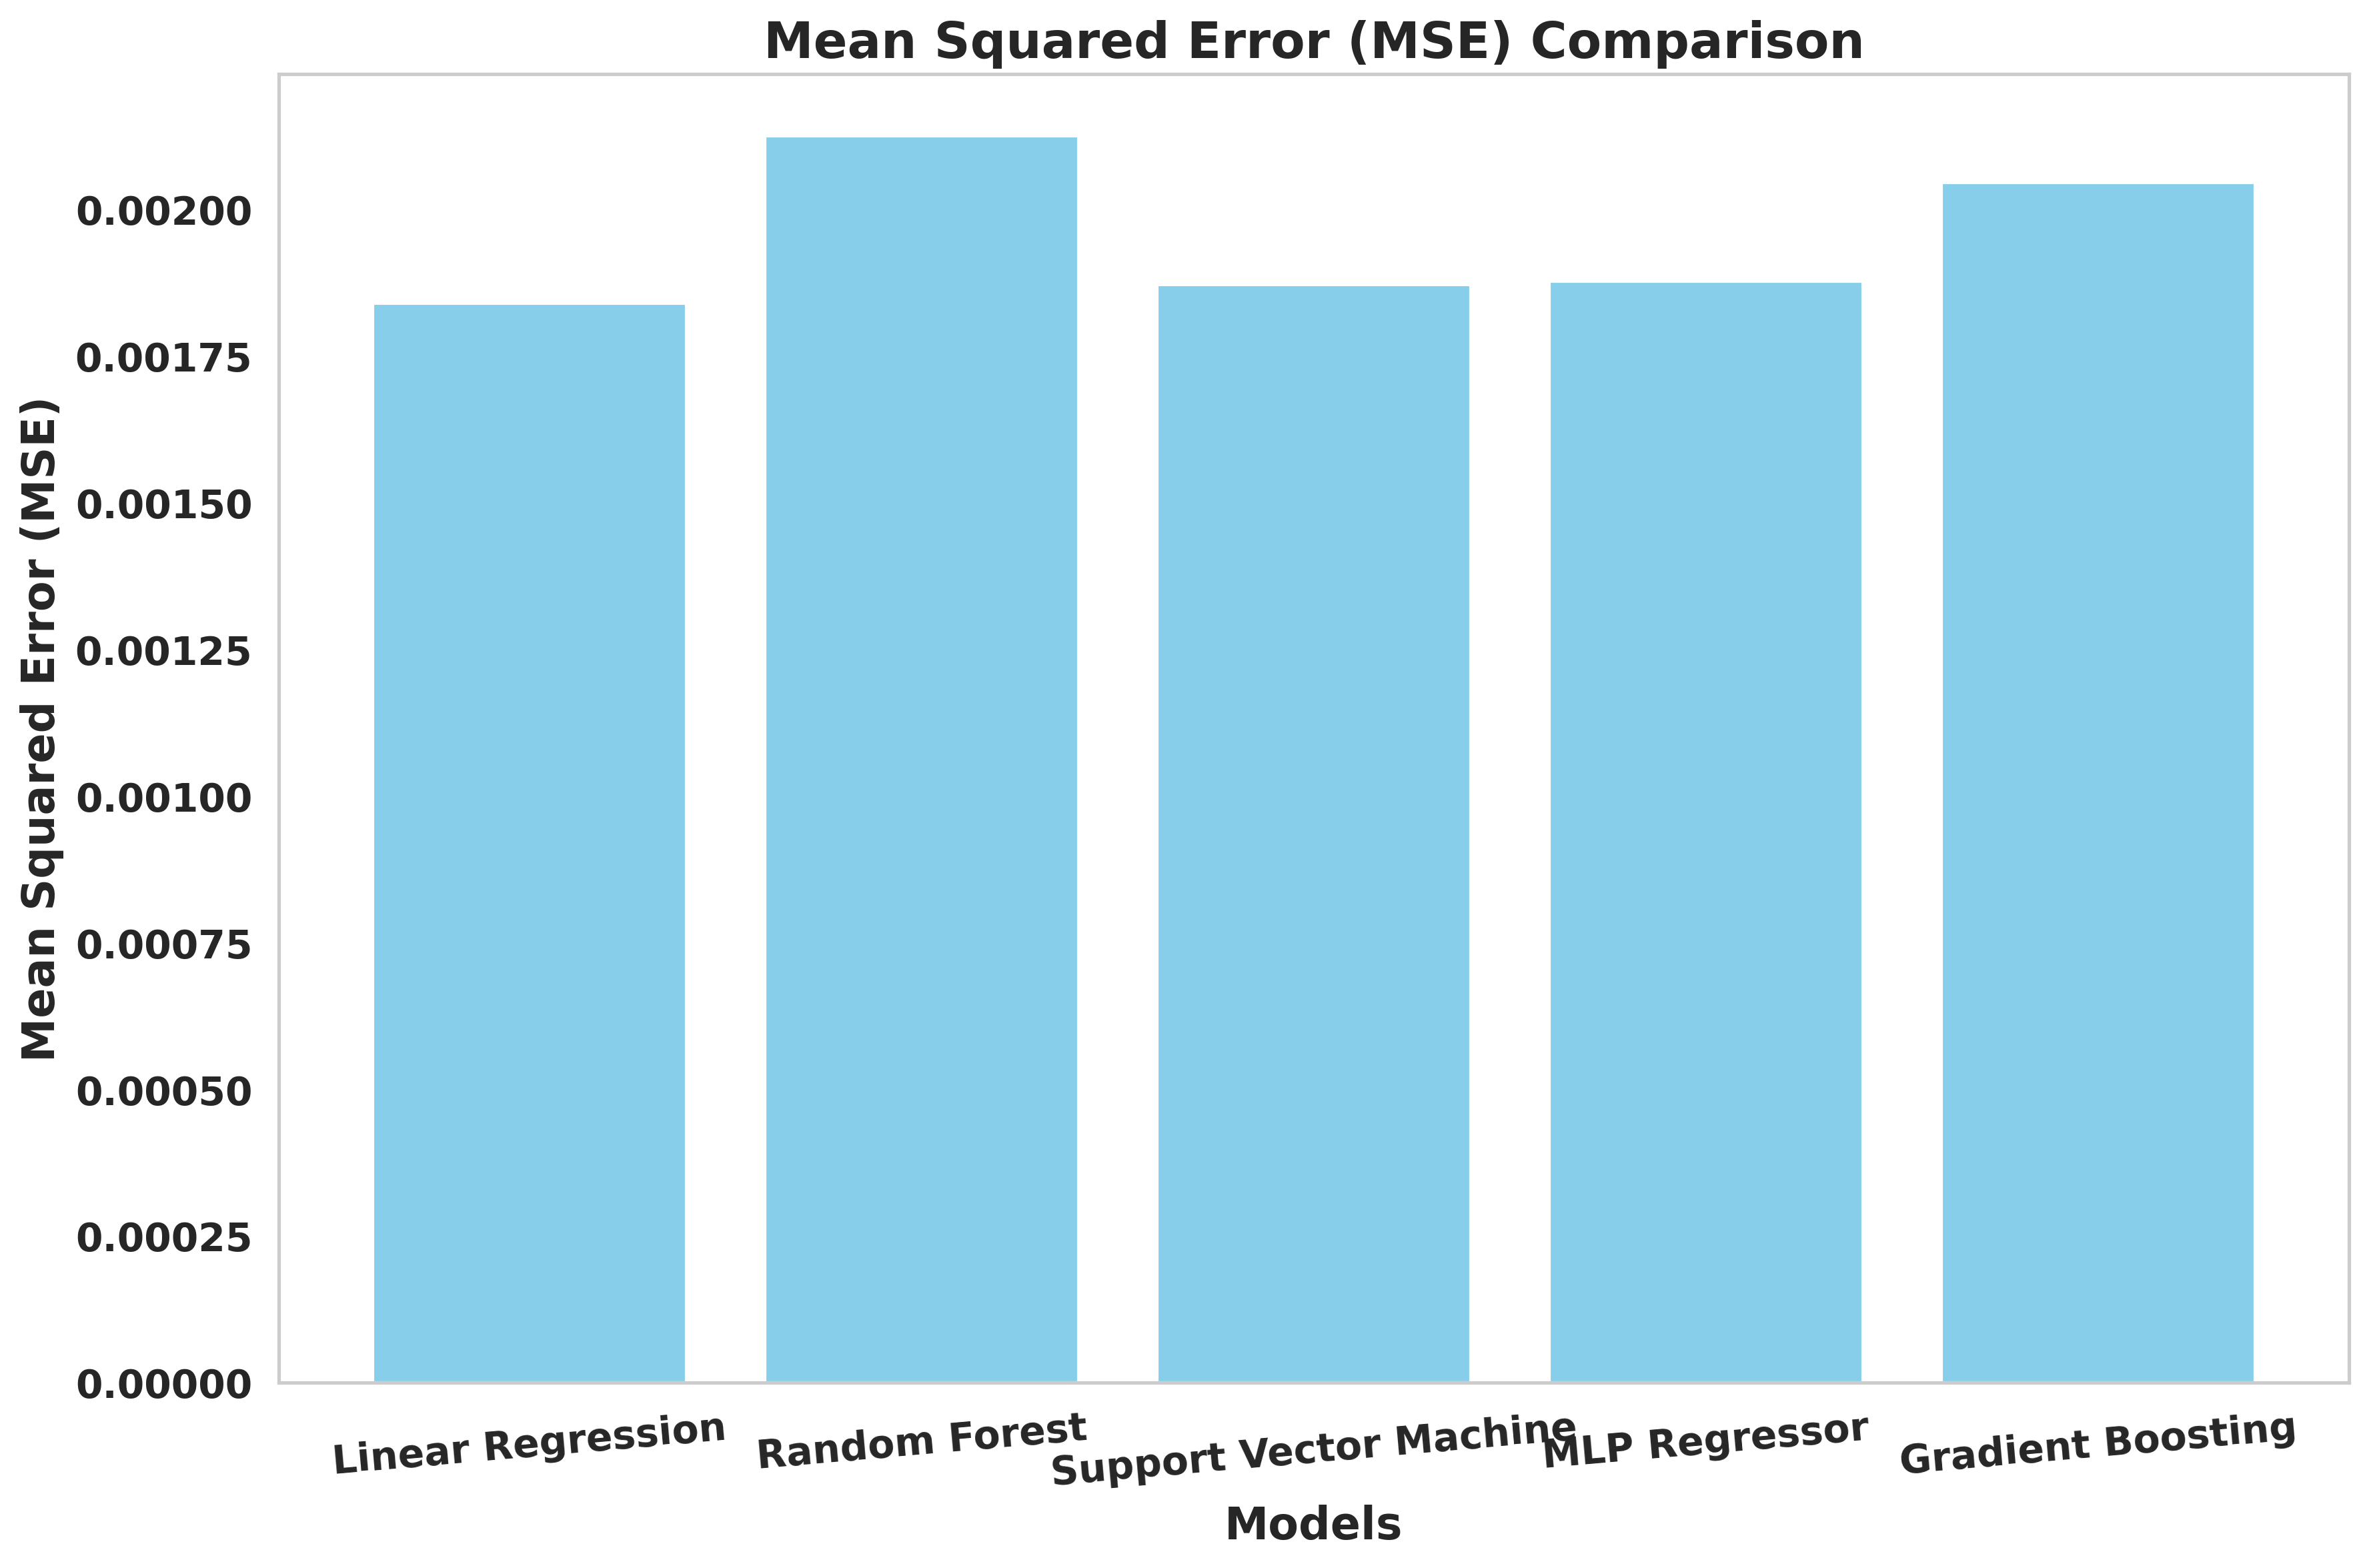

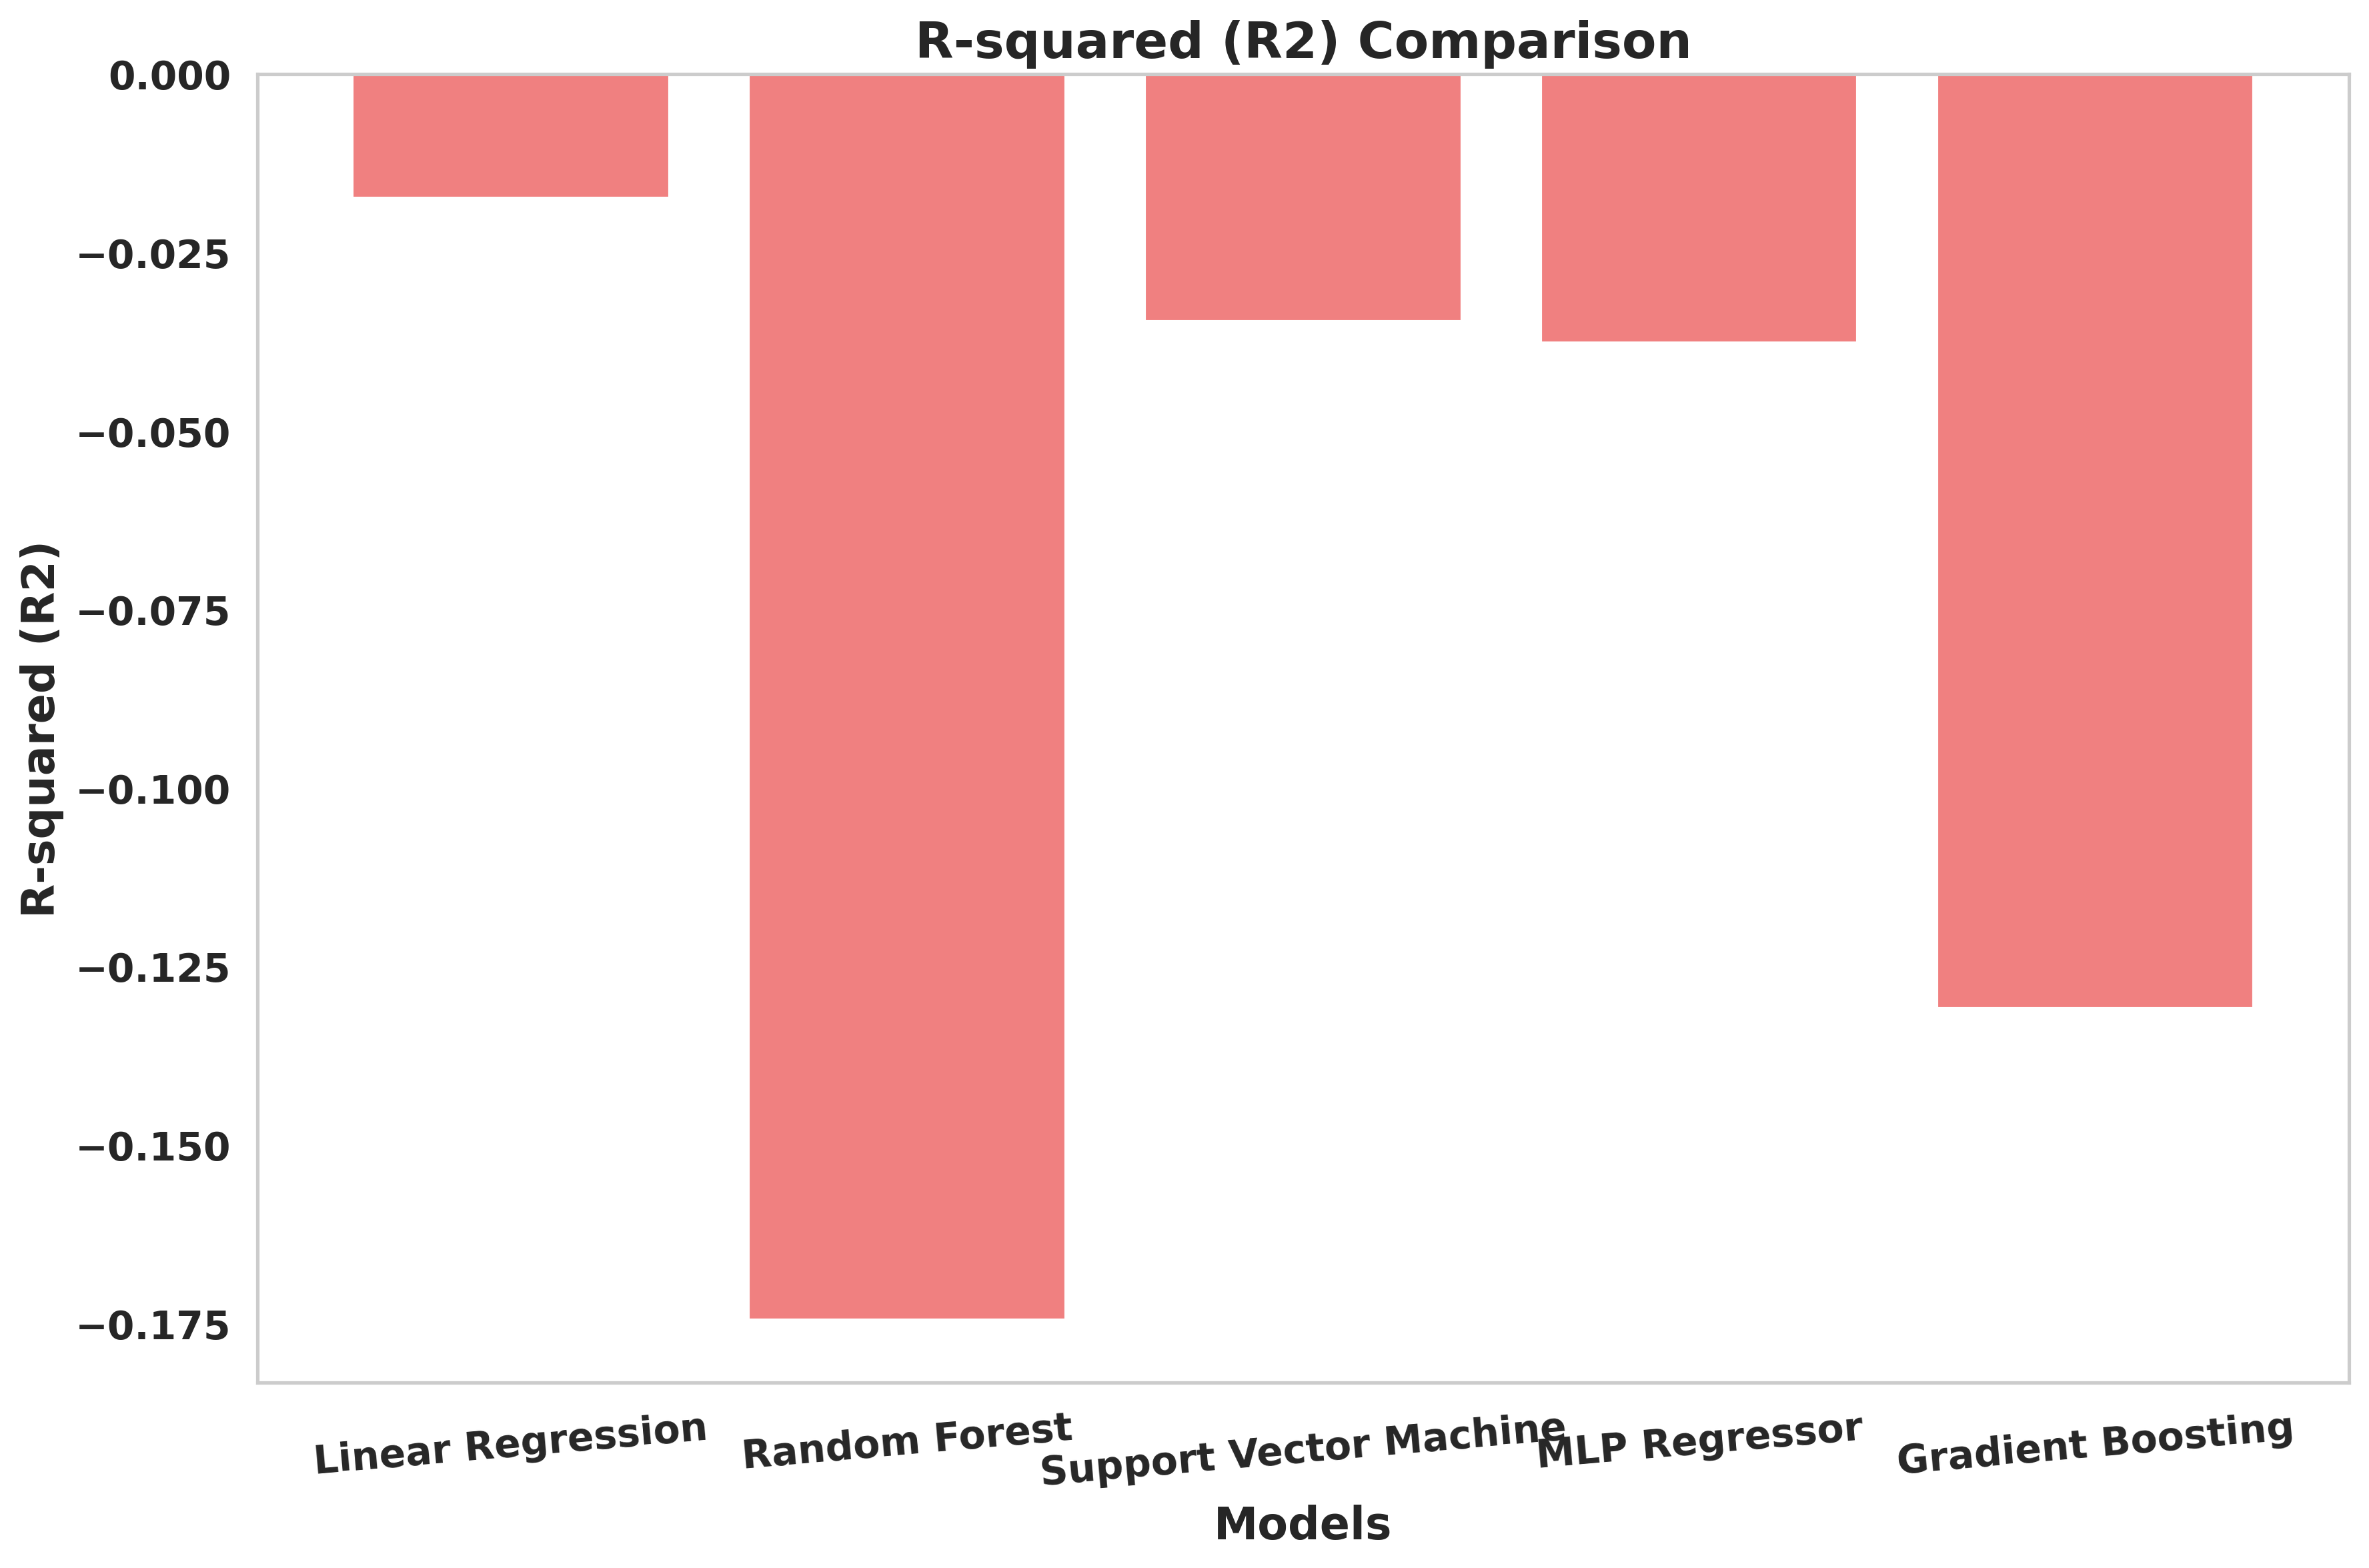

In [ ]:
# Visualize Mean Squared Error (MSE)
plt.figure(figsize=(12, 8), dpi=300)  # Set figure size and dpi for high-definition
plt.bar(mse_values.keys(), mse_values.values(), color='skyblue')
plt.xlabel('Models', fontsize=16, weight='bold')  # Set x-axis label font size and weight
plt.ylabel('Mean Squared Error (MSE)', fontsize=16, weight='bold')  # Set y-axis label font size and weight
plt.title('Mean Squared Error (MSE) Comparison', fontsize=18, weight='bold')  # Set title font size and weight
plt.xticks(rotation=5, fontsize=14, weight='bold')  # Rotate x-axis labels at 45-degree angle, set font size and weight
plt.yticks(fontsize=14, weight='bold')  # Set y-axis tick font size and weight
plt.grid(False)  # Remove grid
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Visualize R-squared (R2)
plt.figure(figsize=(12, 8), dpi=300)  # Set figure size and dpi for high-definition
plt.bar(r2_values.keys(), r2_values.values(), color='lightcoral')
plt.xlabel('Models', fontsize=16, weight='bold')  # Set x-axis label font size and weight
plt.ylabel('R-squared (R2)', fontsize=16, weight='bold')  # Set y-axis label font size and weight
plt.title('R-squared (R2) Comparison', fontsize=18, weight='bold')  # Set title font size and weight
plt.xticks(rotation=10, fontsize=14, weight='bold')  # Rotate x-axis labels at 45-degree angle, set font size and weight
plt.yticks(fontsize=14, weight='bold')  # Set y-axis tick font size and weight
plt.grid(False)  # Remove grid
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



Linear Regression:
MAE: 0.2481, RMSE: 0.2902

Random Forest Regressor:
MAE: 0.2691, RMSE: 0.3118

Gradient Boosting Regressor:
MAE: 0.2640, RMSE: 0.3059

Ridge Regression with Cross-Validation:
Cross-Validation Score (neg MSE): -0.0892


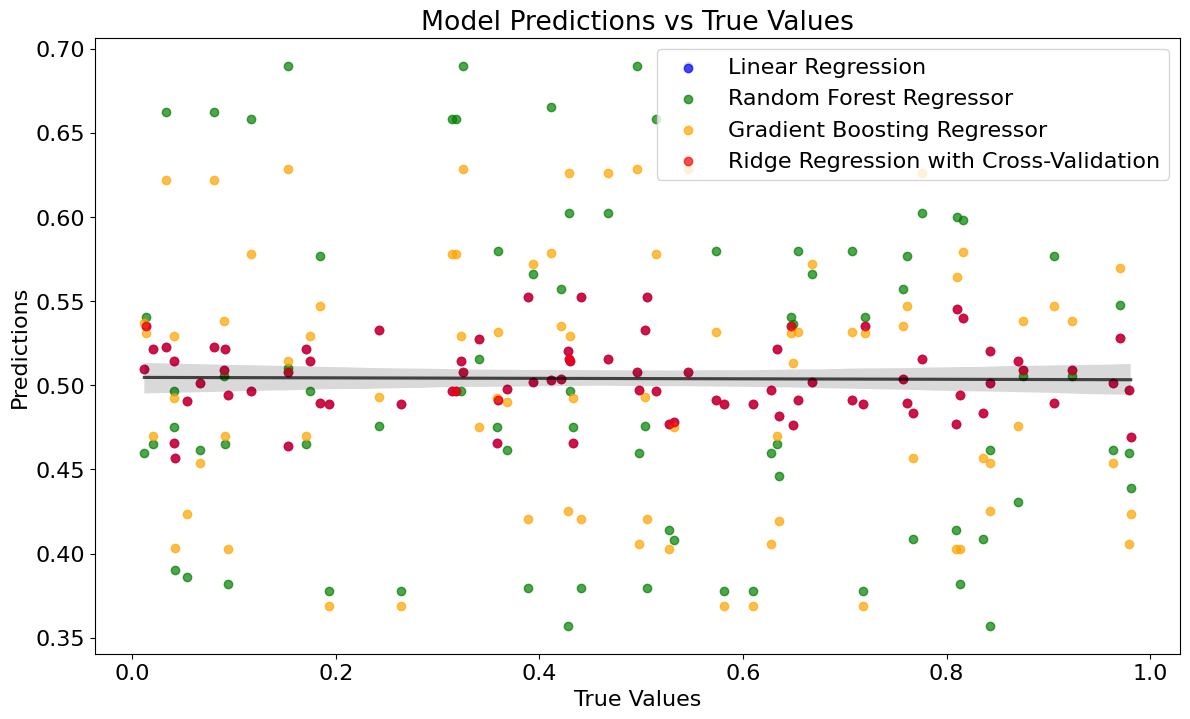

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('pcf_data.xlsx', sheet_name='Sheet1')

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)
df_scaler = scaler.transform(df)

# Define inputs and outputs
num_inputs = 3
num_outputs = 1
X = df_scaler[:, range(0, num_inputs)]
y = df_scaler[:, range(num_inputs, num_inputs + num_outputs)]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Ridge Regression with Cross-Validation
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_cv_score = np.mean(cross_val_score(ridge_model, X, y.ravel(), cv=5, scoring='neg_mean_squared_error'))

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=1, n_estimators=100)
rf_model.fit(X_train, y_train.ravel())
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=1, n_estimators=100)
gb_model.fit(X_train, y_train.ravel())
gb_pred = gb_model.predict(X_test)

# Evaluate models
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))

# Set font sizes
font_size = 16
plt.rcParams.update({'font.size': font_size})

# Print results
print("Linear Regression:")
print(f"MAE: {linear_mae:.4f}, RMSE: {linear_rmse:.4f}")

print("\nRandom Forest Regressor:")
print(f"MAE: {rf_mae:.4f}, RMSE: {rf_rmse:.4f}")

print("\nGradient Boosting Regressor:")
print(f"MAE: {gb_mae:.4f}, RMSE: {gb_rmse:.4f}")

print("\nRidge Regression with Cross-Validation:")
print(f"Cross-Validation Score (neg MSE): {ridge_cv_score:.4f}")

# Visualize results
plt.figure(figsize=(14, 8))

# Scatter plots for all models in a single plot
plt.scatter(y_test, linear_pred, color='blue', alpha=0.7, label='Linear Regression')
plt.scatter(y_test, rf_pred, color='green', alpha=0.7, label='Random Forest Regressor')
plt.scatter(y_test, gb_pred, color='orange', alpha=0.7, label='Gradient Boosting Regressor')
sns.regplot(x=y_test.flatten(), y=linear_pred.flatten(), scatter_kws={'color': 'red', 'alpha': 0.7},
            line_kws={'color': 'black', 'alpha': 0.7}, label='Ridge Regression with Cross-Validation')

plt.title('Model Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Save the figure
plt.savefig('model_predictions_vs_true_values.png', dpi=300, bbox_inches='tight')
plt.show()


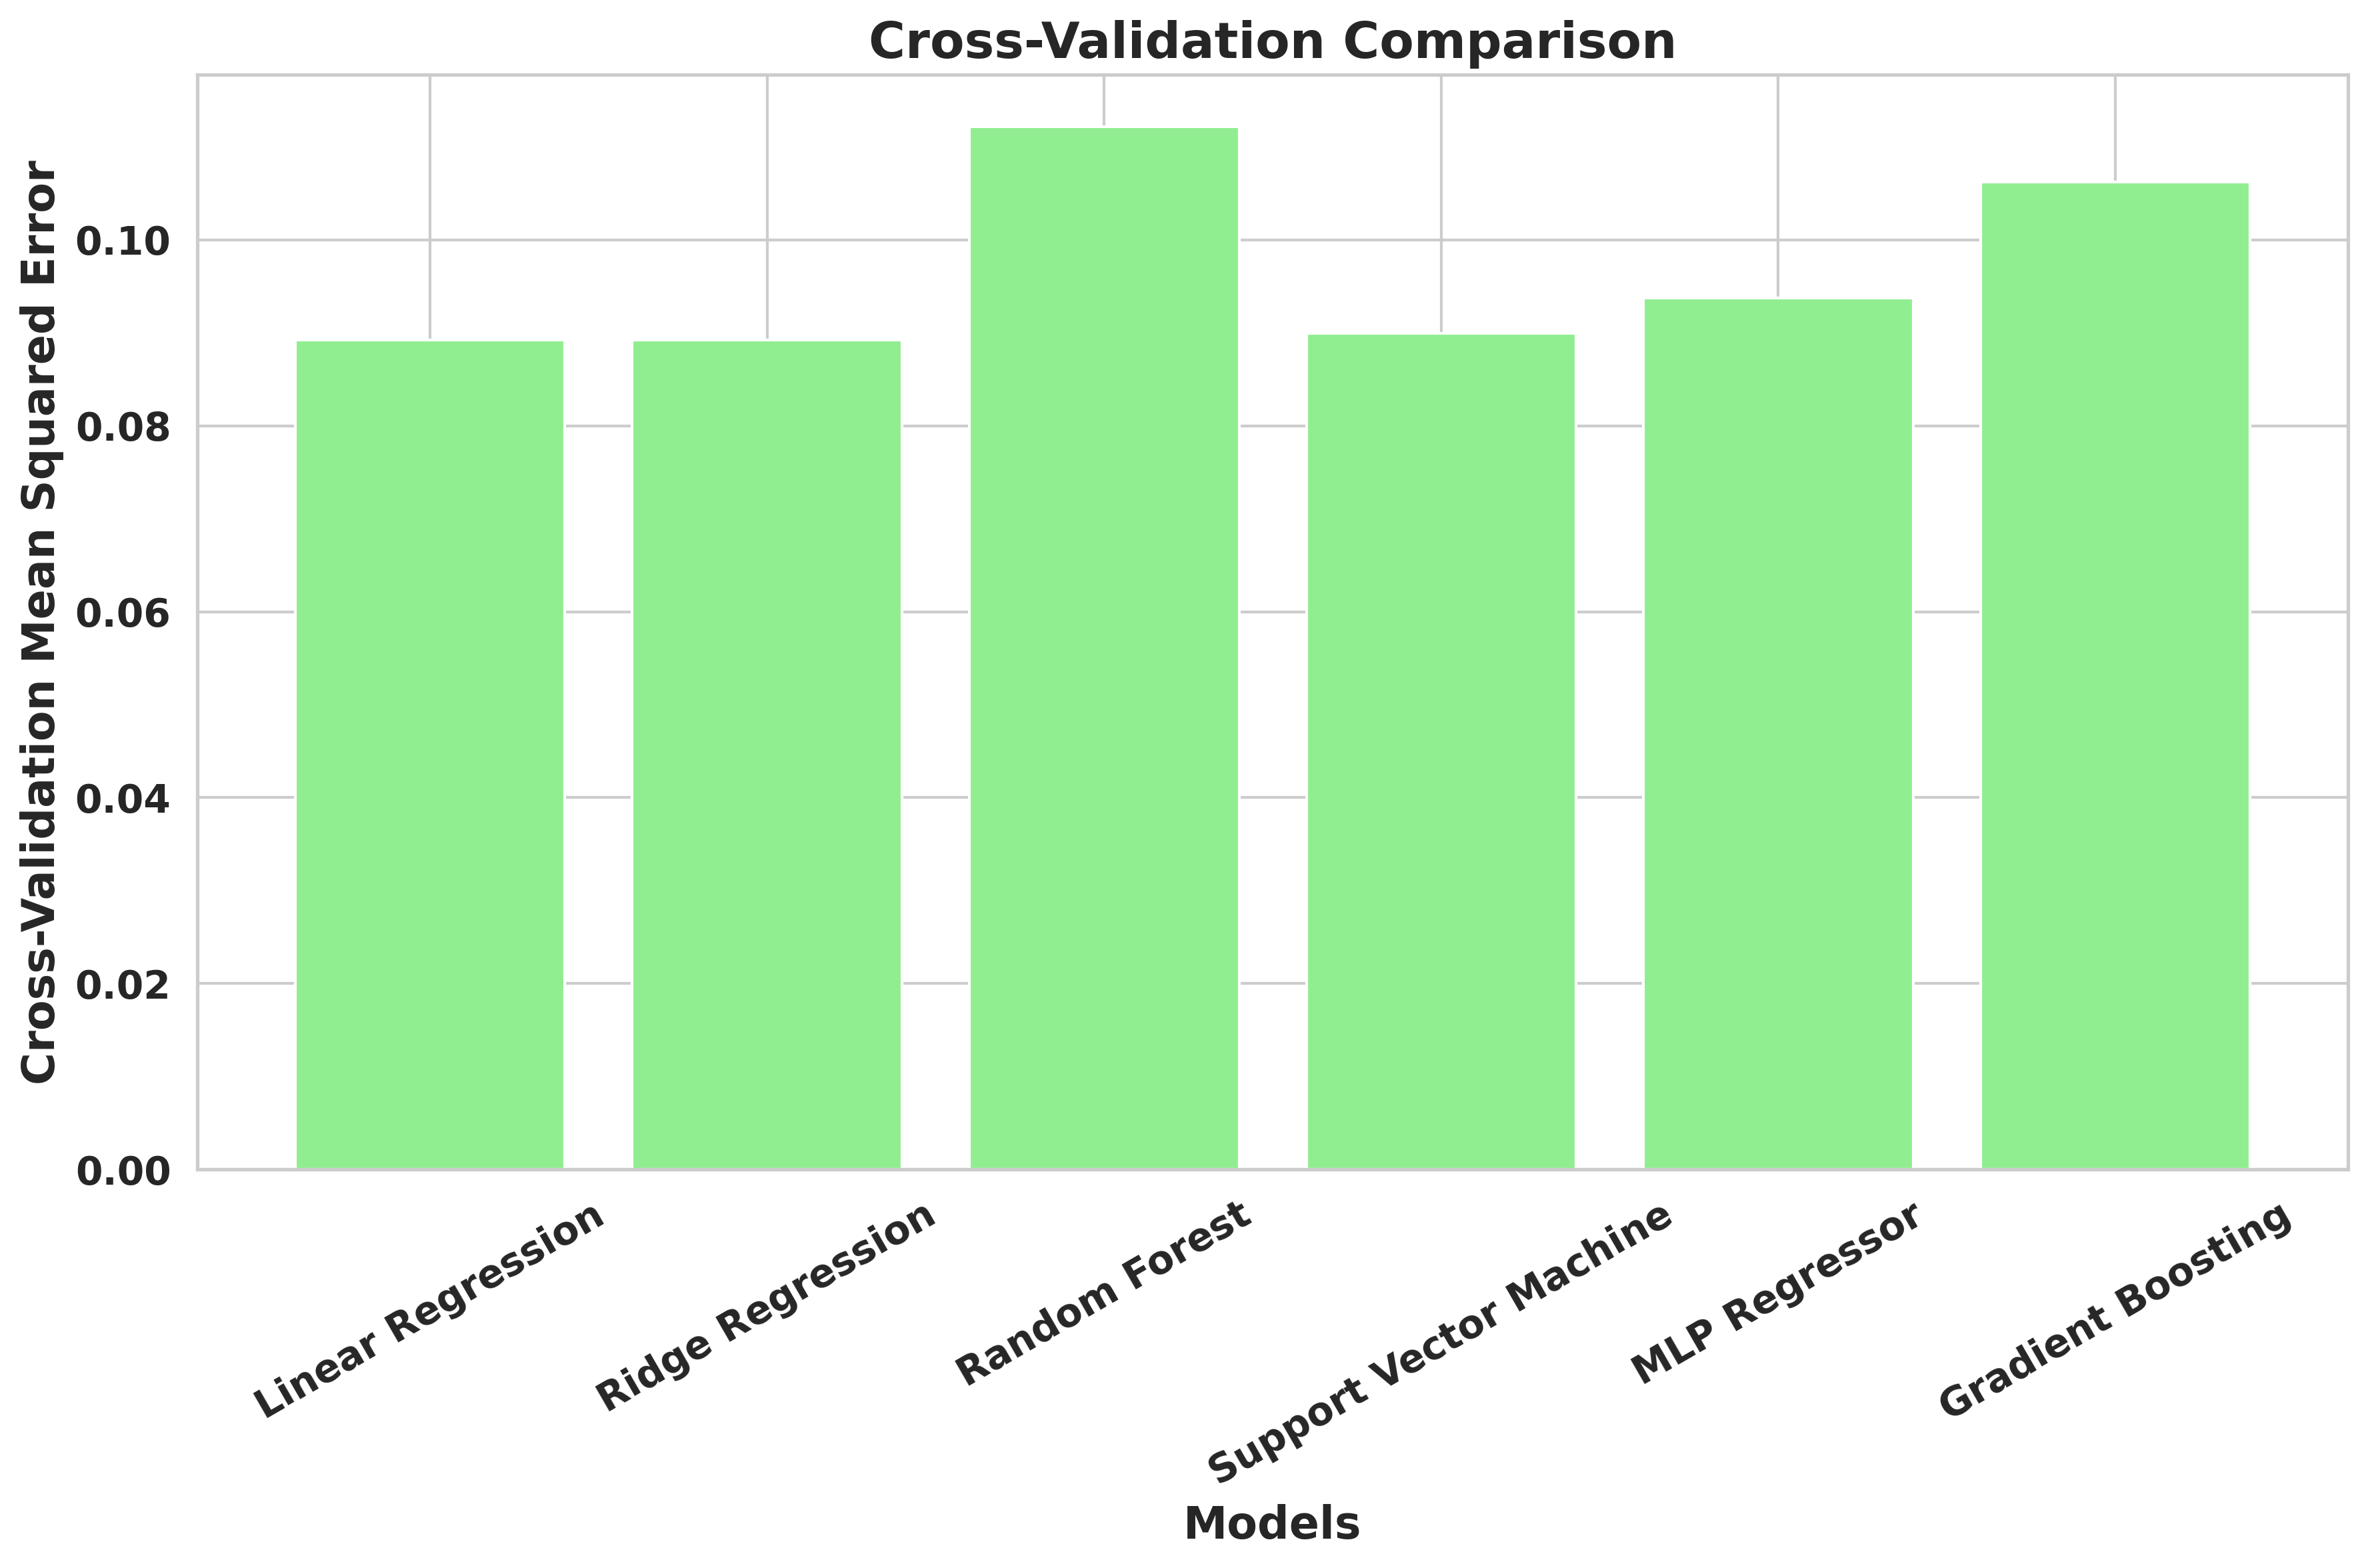


Cross-Validation Mean Squared Error:
Linear Regression: 0.0893
Ridge Regression: 0.0892
Random Forest: 0.1122
Support Vector Machine: 0.0900
MLP Regressor: 0.0937
Gradient Boosting: 0.1062


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('pcf_data.xlsx', sheet_name='Sheet1')

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)
df_scaler = scaler.transform(df)

# Define inputs and outputs
num_inputs = 3
num_outputs = 1
X = df_scaler[:, range(0, num_inputs)]
y = df_scaler[:, range(num_inputs, num_inputs + num_outputs)]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
rf_model = RandomForestRegressor(random_state=1, n_estimators=100)
svm_model = SVR(kernel='linear')
mlp_model = MLPRegressor(shuffle=True, random_state=1, max_iter=1000)
gb_model = GradientBoostingRegressor(random_state=1, n_estimators=100)

models = {
    'Linear Regression': linear_model,
    'Ridge Regression': ridge_model,
    'Random Forest': rf_model,
    'Support Vector Machine': svm_model,
    'MLP Regressor': mlp_model,
    'Gradient Boosting': gb_model
}

# Evaluate models with cross-validation
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = -scores.mean()

# Plot cross-validation results
plt.figure(figsize=(12, 8), dpi=300)  # Set figure size and dpi for high-definition
plt.bar(cv_results.keys(), cv_results.values(), color='lightgreen')
plt.xlabel('Models', fontsize=16, weight='bold')  # Set x-axis label font size and weight
plt.ylabel('Cross-Validation Mean Squared Error', fontsize=16, weight='bold')  # Set y-axis label font size and weight
plt.title('Cross-Validation Comparison', fontsize=18, weight='bold')  # Set title font size and weight
plt.xticks(rotation=30,fontsize=14, weight='bold')  # Set x-axis tick font size and weight
plt.yticks(fontsize=14, weight='bold')  # Set y-axis tick font size and weight
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Print results
print("\nCross-Validation Mean Squared Error:")
for name, cv_result in cv_results.items():
    print(f'{name}: {cv_result:.4f}')



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


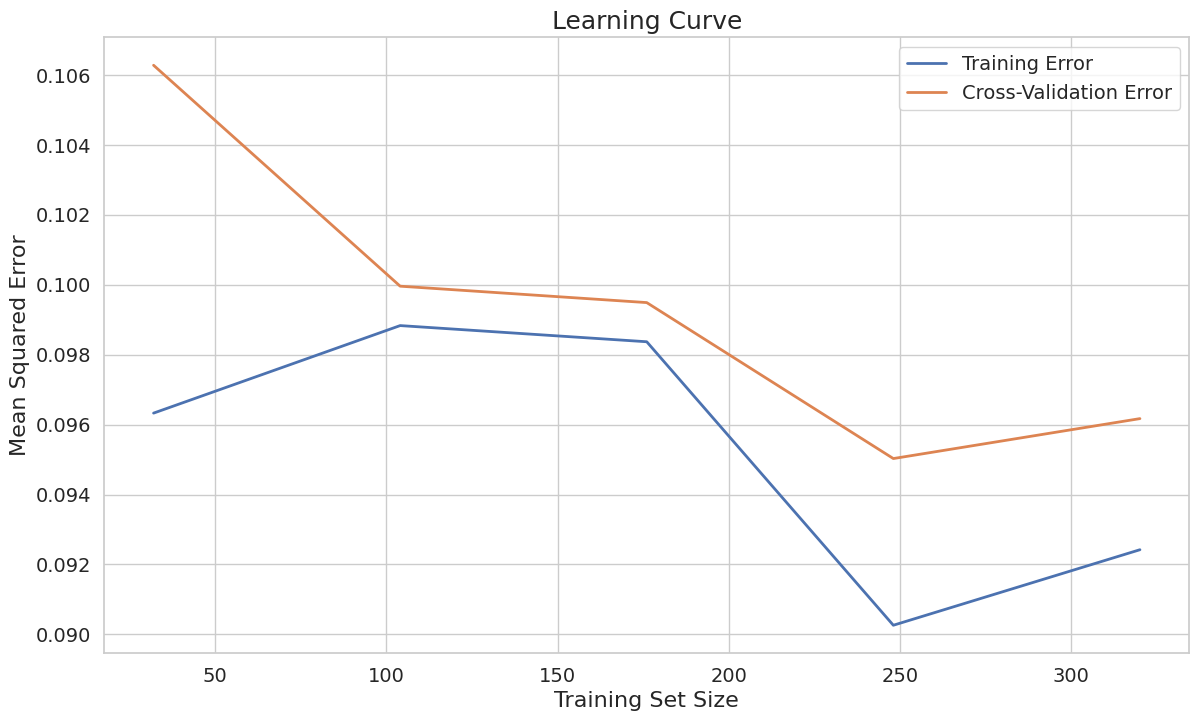

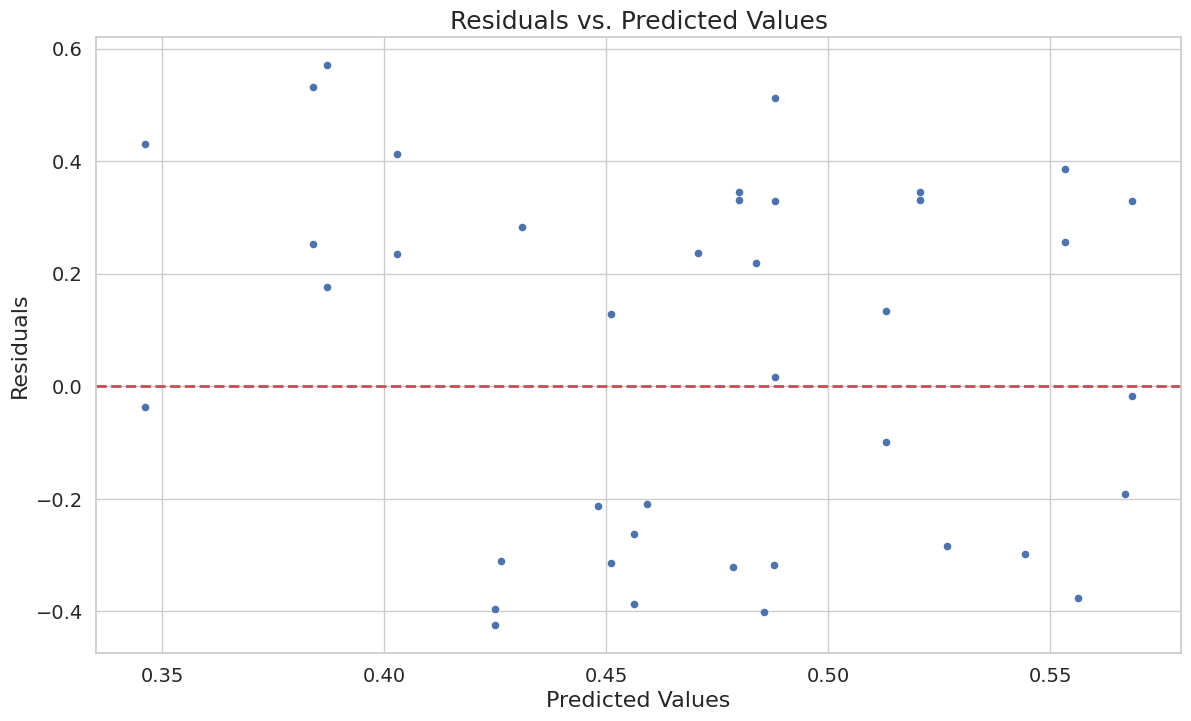


Metrics:
Mean Absolute Error: 0.29117716420665685
Mean Squared Error: 0.10110753681074532
R-squared: -0.04935216211232518
Cross-Validation Mean Squared Error: 0.09617185359614434

Metrics:
Mean Absolute Error: 0.29117716420665685
Mean Squared Error: 0.10110753681074532
R-squared: -0.04935216211232518
Cross-Validation Mean Squared Error: 0.09617185359614434


<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('pcf_data.xlsx', sheet_name='Sheet1')

# Set feature range based on the data distribution
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)

# Scale features
df_scaler = scaler.transform(df)

# Define input and output columns
num_inputs = 3
num_outputs = 1

# Split data into training and testing sets
X = df_scaler[:, range(0, num_inputs)]
y = df_scaler[:, range(num_inputs, num_inputs + num_outputs)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define and train the MLP model
epochs = 1000
mlp = MLPRegressor(shuffle=True, random_state=1, max_iter=epochs)
mlp.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = mlp.predict(X_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X, y.ravel(), cv=cv, scoring='neg_mean_squared_error')
cv_mse_mean = np.mean(-cv_scores)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X, y.ravel(), cv=cv, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)

# Plot Learning Curve with increased font size
plt.figure(figsize=(14, 8))
plt.plot(train_sizes, train_scores_mean, label='Training Error', linewidth=2)
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Error', linewidth=2)
plt.xlabel('Training Set Size', fontsize=16)
plt.ylabel('Mean Squared Error', fontsize=16)
plt.title('Learning Curve', fontsize=18)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Feature Importance (if applicable)
if hasattr(mlp, 'feature_importances_'):
    feature_importances = mlp.feature_importances_
    # Visualize feature importance

# Residual Analysis
residuals = y_test.ravel() - y_pred_test.ravel()
plt.figure(figsize=(14, 8))
plt.scatter(y_pred_test.ravel(), residuals, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Residuals', fontsize=16)
plt.title('Residuals vs. Predicted Values', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Print Metrics with increased font size
print('\nMetrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Cross-Validation Mean Squared Error:', cv_mse_mean)
# Print Metrics with increased font size
print('\nMetrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Cross-Validation Mean Squared Error:', cv_mse_mean)

# Save the Learning Curve figure as a high-definition image
plt.savefig('learning_curve.png', dpi=300, bbox_inches='tight')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


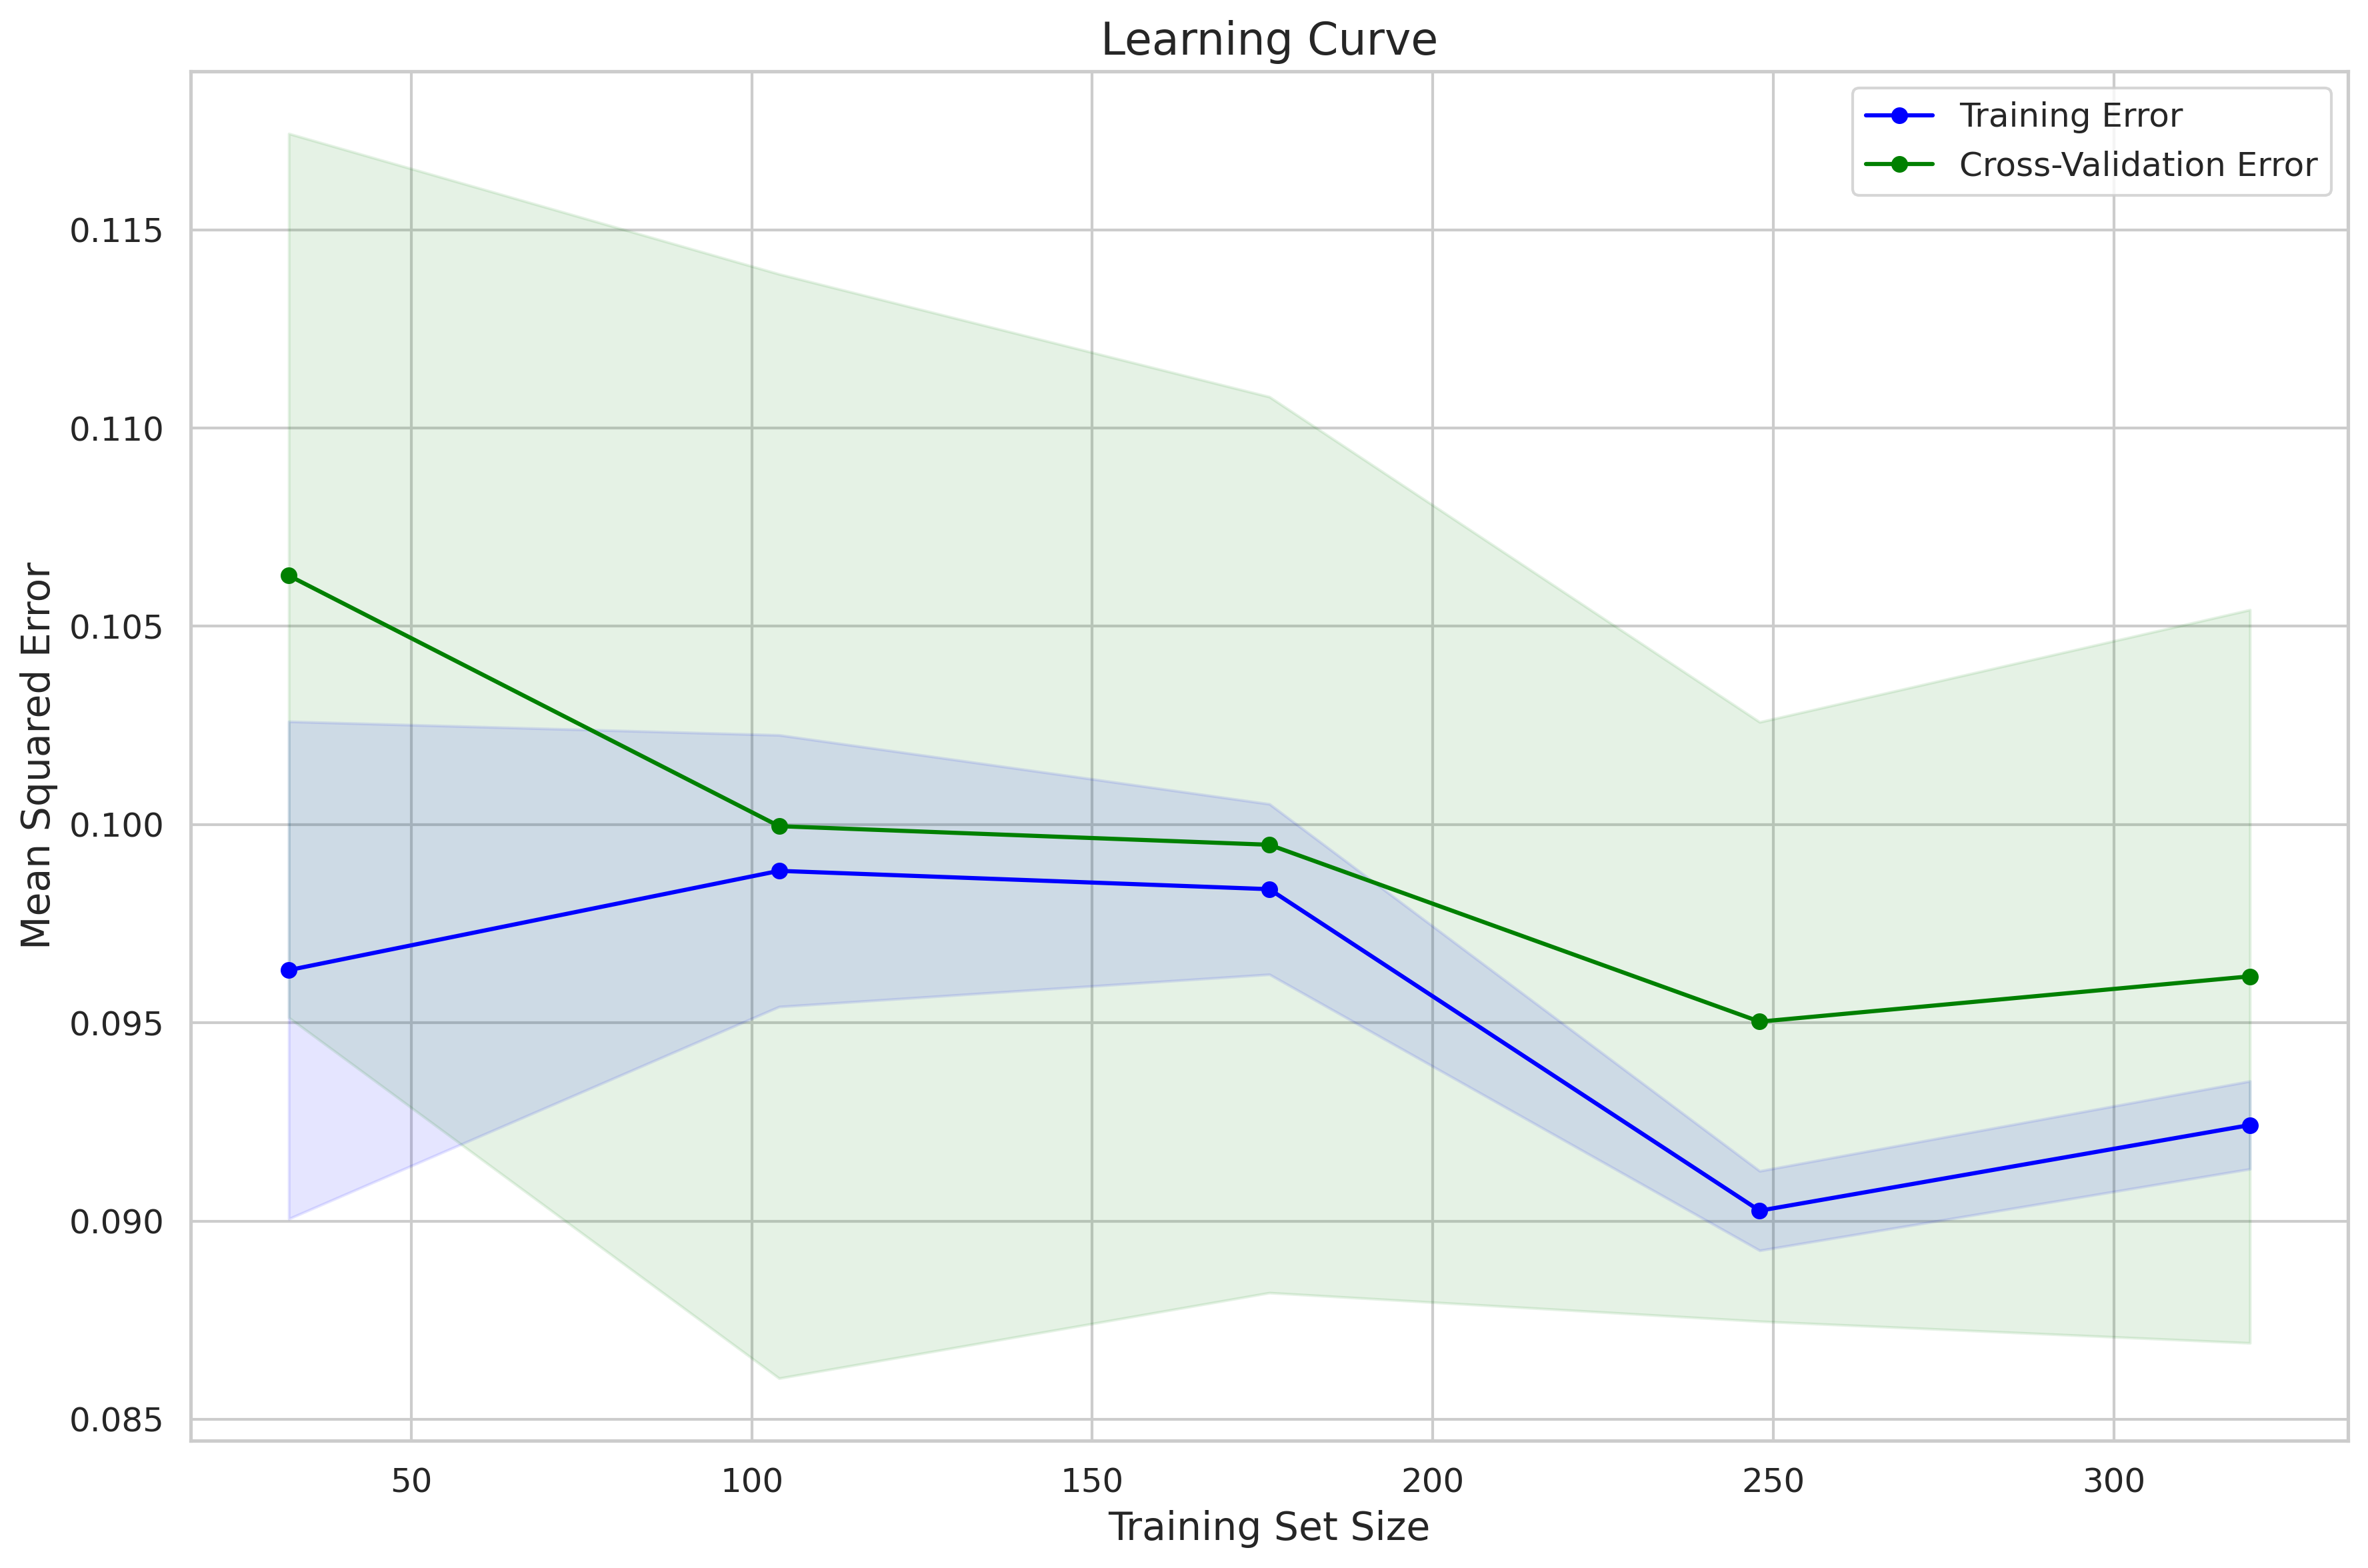


Learning Curve Results:
Training Sizes: [ 32 104 176 248 320]
Training Scores Mean: [0.09632903 0.09883298 0.09837049 0.0902612  0.09242161]
Test Scores Mean: [0.10627981 0.09996    0.09949076 0.09502936 0.09617185]
Training Scores Std: [0.00627139 0.00342599 0.00214935 0.0010024  0.00110821]
Test Scores Std: [0.01114878 0.01392534 0.01129915 0.00755767 0.009247  ]


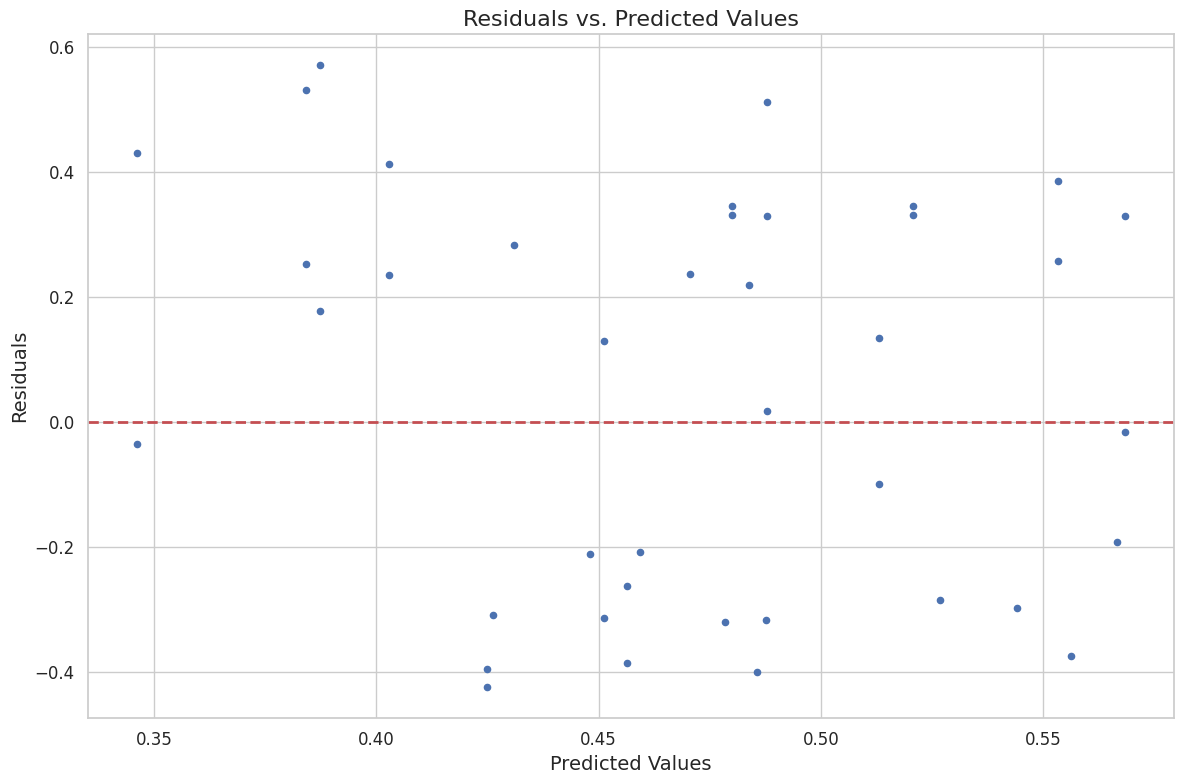


Residual Analysis Results:
Residuals: [-0.32045964  0.32968588  0.57052426 -0.01662675  0.17719038 -0.03580827
 -0.29796532  0.43097123  0.2184179   0.34499812  0.28239529  0.13455643
 -0.40090778 -0.42443227 -0.3097323  -0.39513946  0.23656558  0.33160447
  0.01698591  0.2568927  -0.38627627 -0.37518304 -0.09952146  0.32900408
 -0.19178703  0.34534187  0.25353344 -0.2842981  -0.3141059   0.53174594
  0.38604916  0.23446432  0.51160252 -0.26253686  0.12916643  0.33044357
  0.41206852 -0.31711873 -0.21208909 -0.20889031]

Metrics:
Mean Absolute Error: 0.29117716420665685
Mean Squared Error: 0.10110753681074532
R-squared: -0.04935216211232518
Cross-Validation Mean Squared Error: 0.09617185359614434


In [ ]:
# Load data
df = pd.read_excel('pcf_data.xlsx', sheet_name='Sheet1')

# Set feature range based on the data distribution
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)

# Scale features
df_scaler = scaler.transform(df)

# Define input and output columns
num_inputs = 3
num_outputs = 1

# Split data into training and testing sets
X = df_scaler[:, range(0, num_inputs)]
y = df_scaler[:, range(num_inputs, num_inputs + num_outputs)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define and train the MLP model
epochs = 1000
mlp = MLPRegressor(shuffle=True, random_state=1, max_iter=epochs)
mlp.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = mlp.predict(X_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X, y.ravel(), cv=cv, scoring='neg_mean_squared_error')
cv_mse_mean = np.mean(-cv_scores)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X, y.ravel(), cv=cv, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
test_scores_std = np.std(-test_scores, axis=1)

# Plot Learning Curve with increased font size and enhanced visual appearance
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o', markersize=5, color='blue', linestyle='-')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Error', marker='o', markersize=5, color='green', linestyle='-')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Learning Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Print Learning Curve results
print('\nLearning Curve Results:')
print(f'Training Sizes: {train_sizes}')
print(f'Training Scores Mean: {train_scores_mean}')
print(f'Test Scores Mean: {test_scores_mean}')
print(f'Training Scores Std: {train_scores_std}')
print(f'Test Scores Std: {test_scores_std}')

# Feature Importance (if applicable)
if hasattr(mlp, 'feature_importances_'):
    feature_importances = mlp.feature_importances_
    # Visualize feature importance

# Residual Analysis
residuals = y_test.ravel() - y_pred_test.ravel()
plt.figure(figsize=(12, 8))
plt.scatter(y_pred_test.ravel(), residuals, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print Residual Analysis results
print('\nResidual Analysis Results:')
print(f'Residuals: {residuals}')

# Print Metrics with increased font size
print('\nMetrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Cross-Validation Mean Squared Error:', cv_mse_mean)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


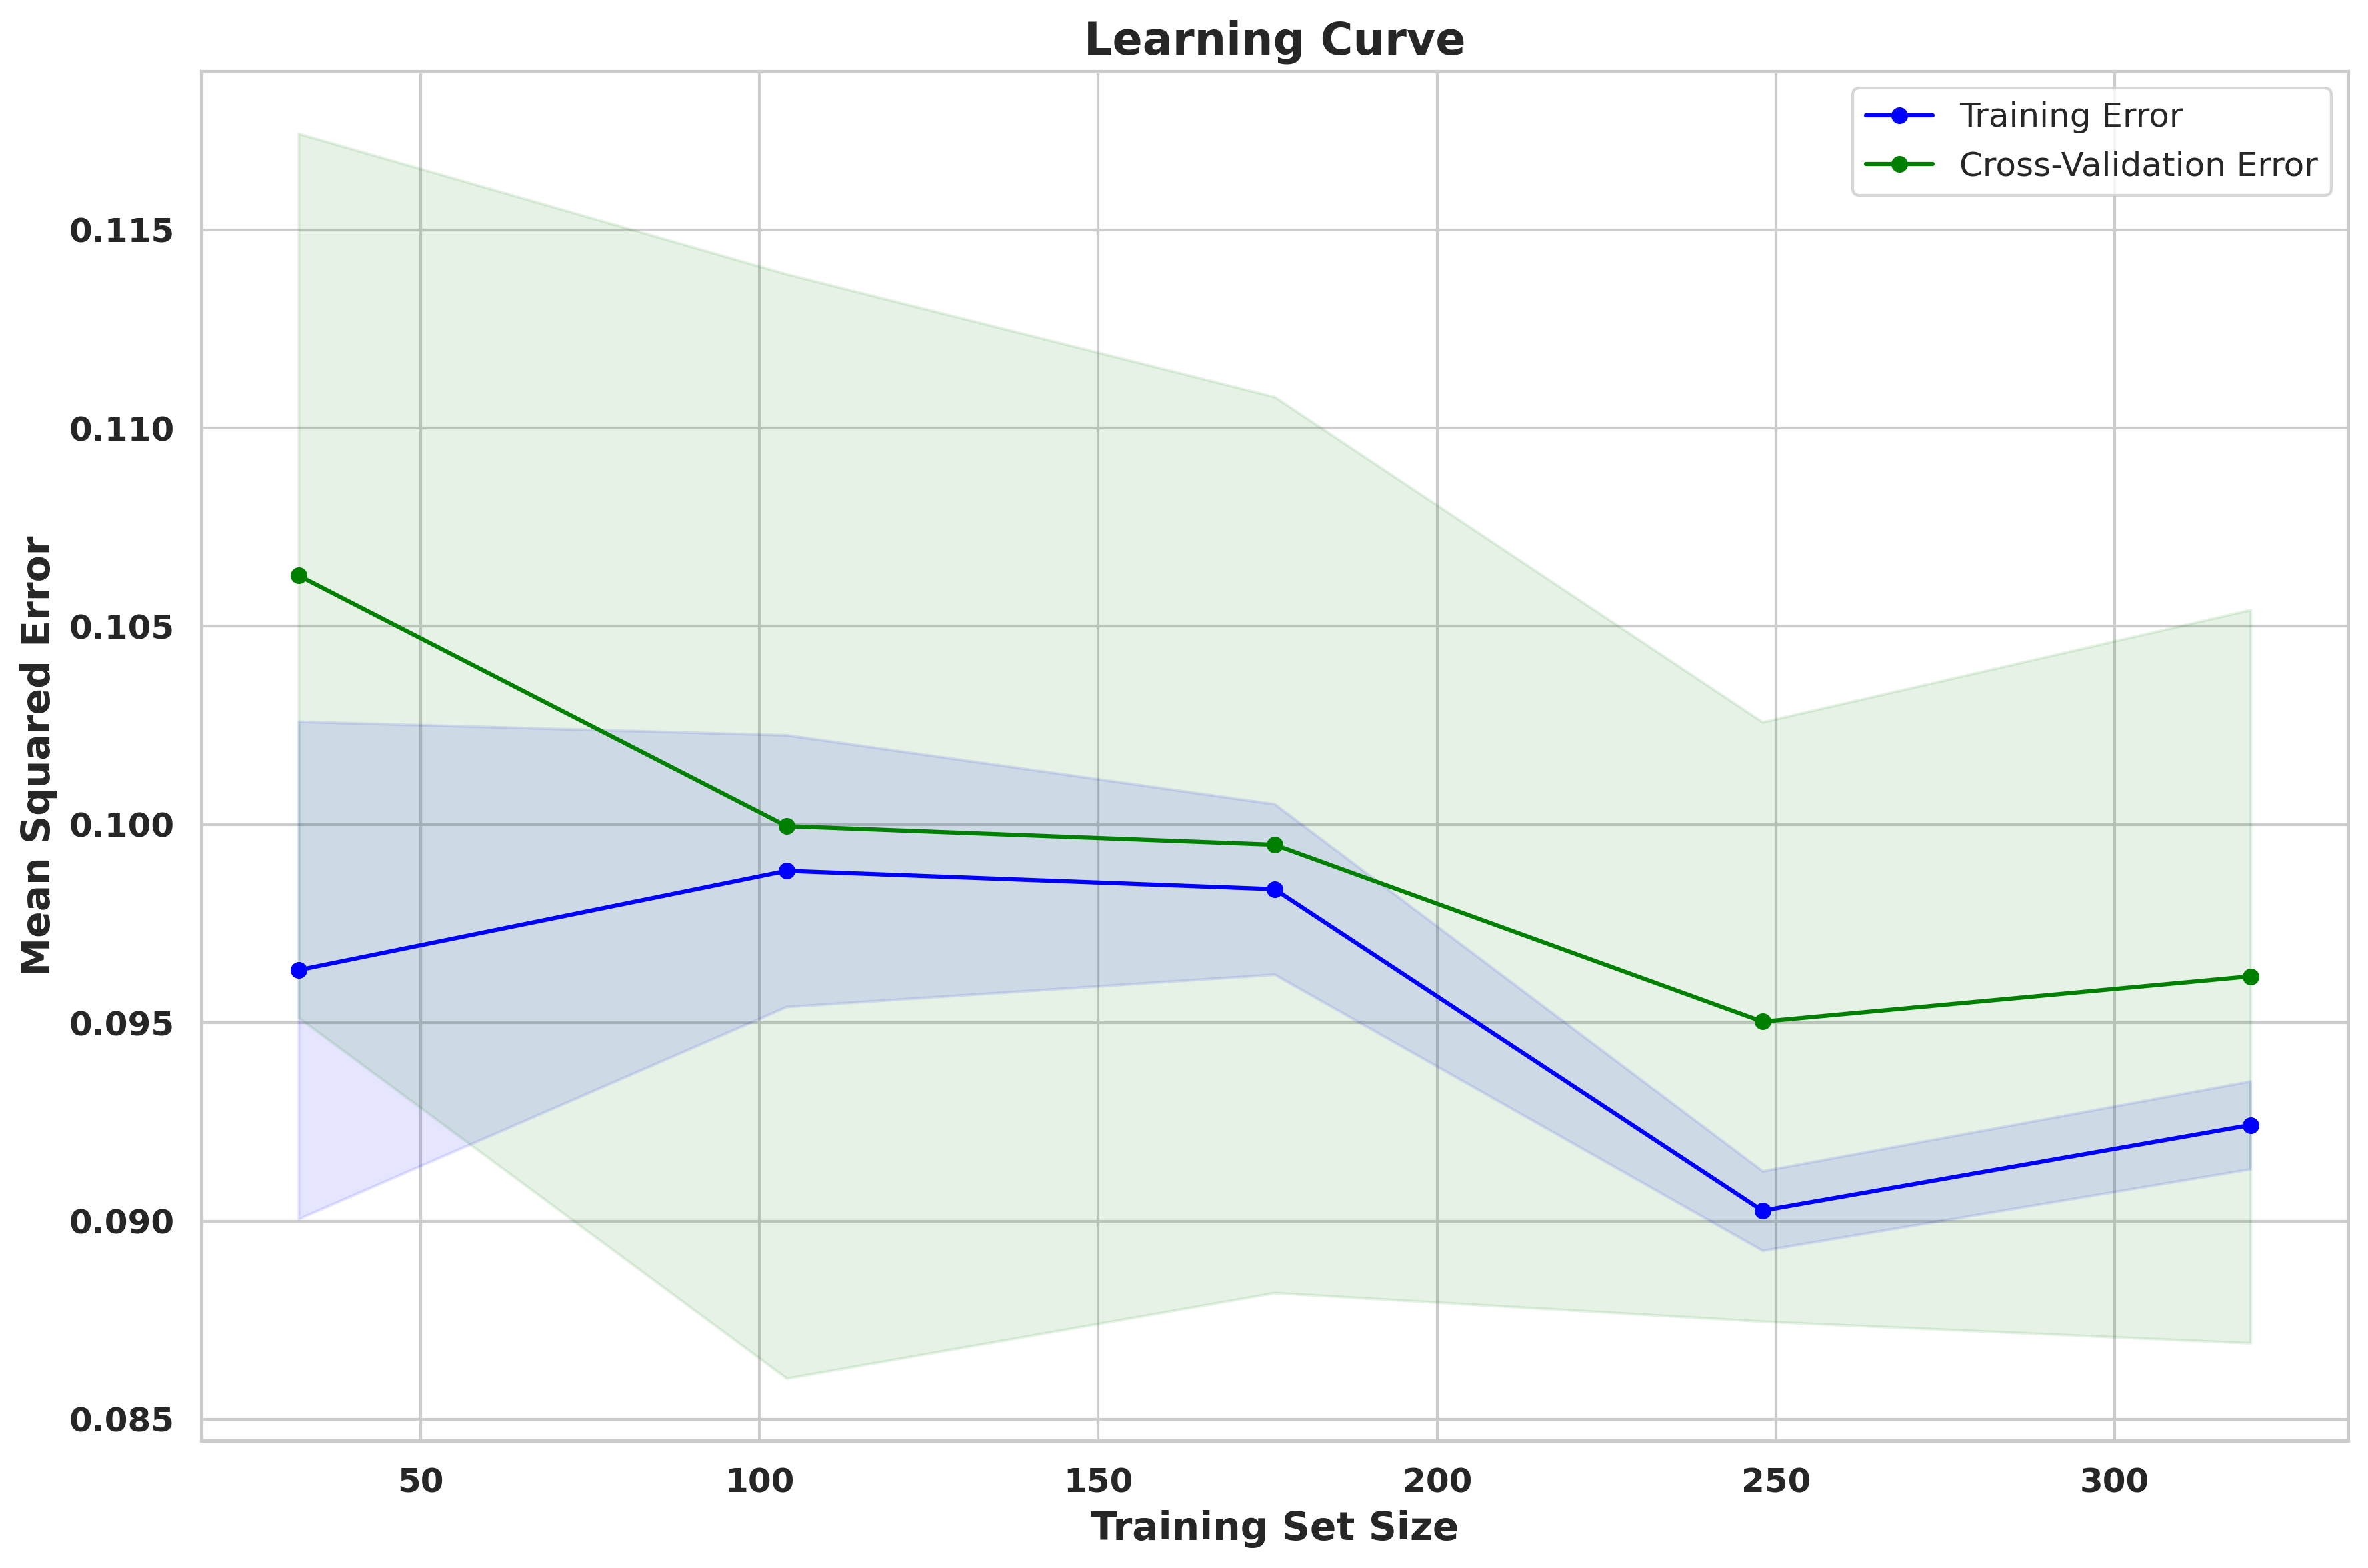

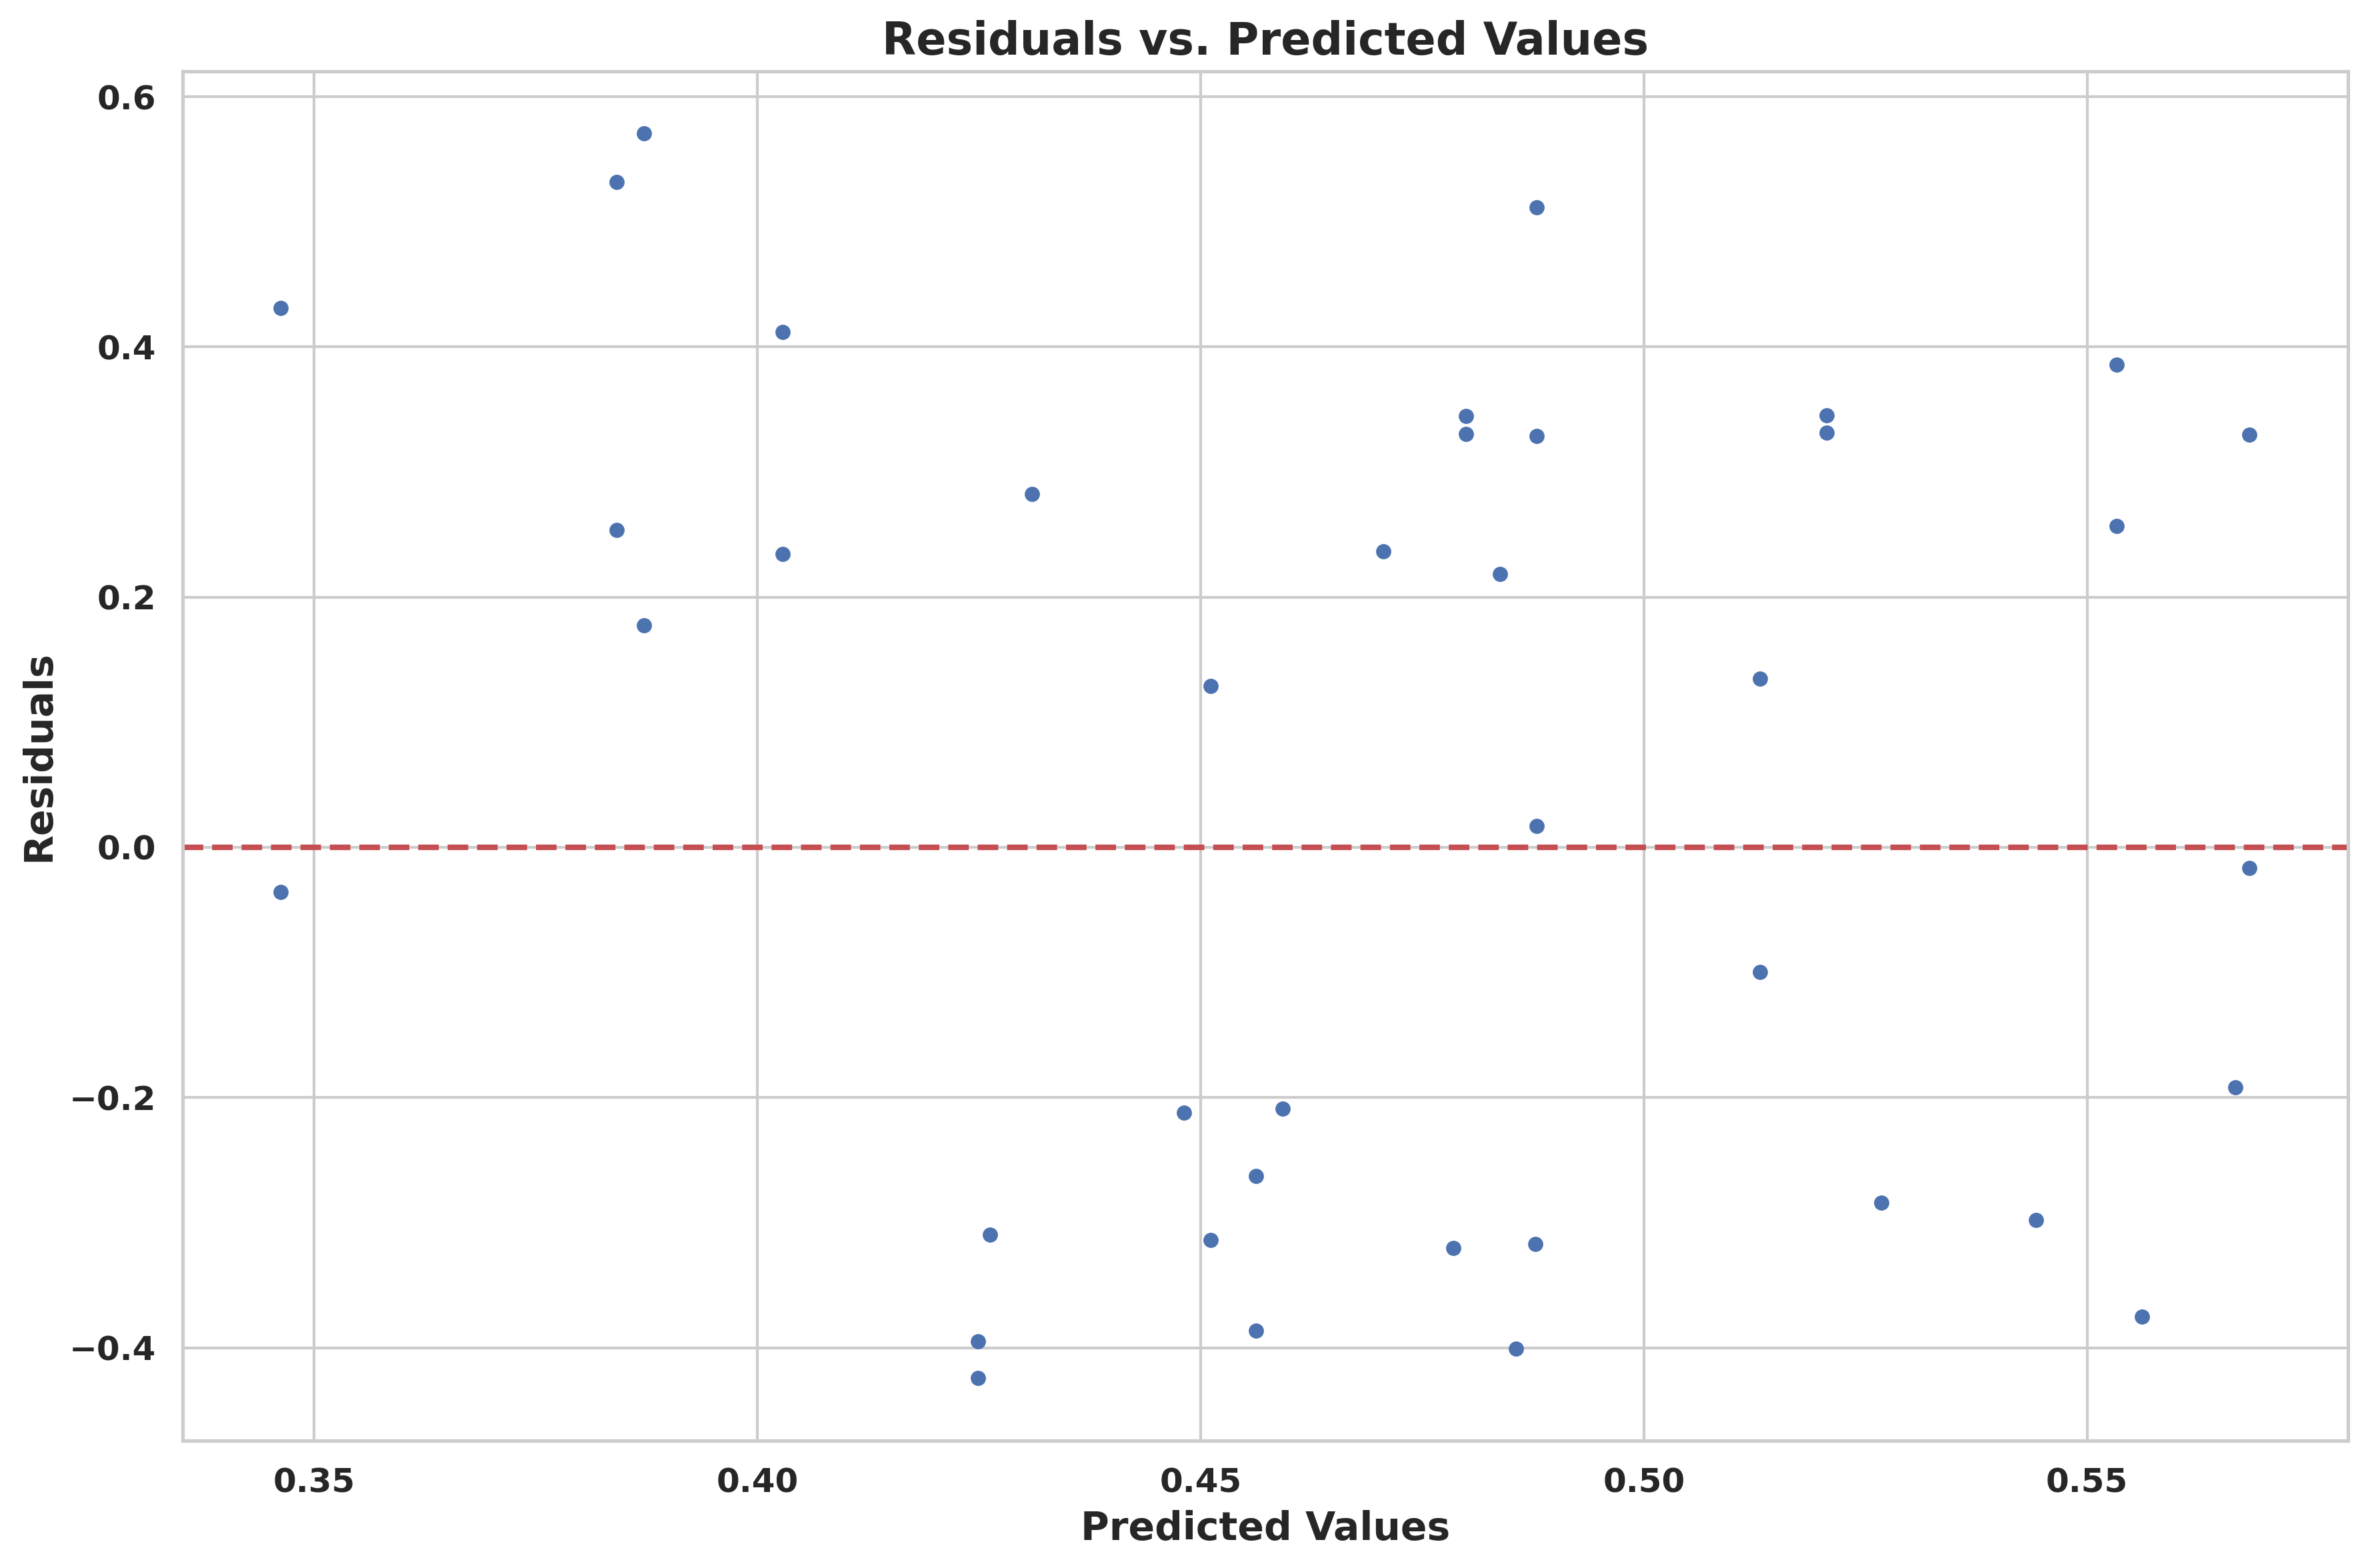


Metrics:
Mean Absolute Error: 0.29117716420665685
Mean Squared Error: 0.10110753681074532
R-squared: -0.04935216211232518
Cross-Validation Mean Squared Error: 0.09617185359614434


<Figure size 1920x1440 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set DPI to 300
plt.rcParams['figure.dpi'] = 300

# Define a custom font properties object with bold weight
custom_font = fm.FontProperties(weight='bold')

# Load data
df = pd.read_excel('pcf_data.xlsx', sheet_name='Sheet1')

# Set feature range based on the data distribution
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)

# Scale features
df_scaler = scaler.transform(df)

# Define input and output columns
num_inputs = 3
num_outputs = 1

# Split data into training and testing sets
X = df_scaler[:, range(0, num_inputs)]
y = df_scaler[:, range(num_inputs, num_inputs + num_outputs)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define and train the MLP model
epochs = 1000
mlp = MLPRegressor(shuffle=True, random_state=1, max_iter=epochs)
mlp.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = mlp.predict(X_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X, y.ravel(), cv=cv, scoring='neg_mean_squared_error')
cv_mse_mean = np.mean(-cv_scores)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X, y.ravel(), cv=cv, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
test_scores_std = np.std(-test_scores, axis=1)

# Plot Learning Curve with increased font size and enhanced visual appearance
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o', markersize=5, color='blue', linestyle='-')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Error', marker='o', markersize=5, color='green', linestyle='-')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size', fontproperties=custom_font, fontsize=14, weight='bold')
plt.ylabel('Mean Squared Error', fontproperties=custom_font, fontsize=14, weight='bold')
plt.title('Learning Curve', fontproperties=custom_font, fontsize=16, weight='bold')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

# Feature Importance (if applicable)
if hasattr(mlp, 'feature_importances_'):
    feature_importances = mlp.feature_importances_
    # Visualize feature importance

# Residual Analysis
residuals = y_test.ravel() - y_pred_test.ravel()
plt.figure(figsize=(12, 8))
plt.scatter(y_pred_test.ravel(), residuals, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values', fontproperties=custom_font, fontsize=14, weight='bold')
plt.ylabel('Residuals', fontproperties=custom_font, fontsize=14, weight='bold')
plt.title('Residuals vs. Predicted Values', fontproperties=custom_font, fontsize=16, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print Metrics with increased font size
print('\nMetrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Cross-Validation Mean Squared Error:', cv_mse_mean)

# Save the Learning Curve figure as a high-definition image
plt.savefig('learning_curve.png', dpi=300, bbox_inches='tight')
